In [1]:
import pandas as pd
import numpy as np
import plotly as py
#import seaborn as sns
import matplotlib.pyplot as plt
import folium
import json
import urllib.request

from datetime import datetime,timedelta
#from sklearn.metrics import mean_squared_error
#from scipy.stats import norm
#from scipy.optimize import curve_fit
#from scipy.optimize import fsolve

#%matplotlib inline+

url_B = "https://data.brasil.io/dataset/covid19/caso_full.csv.gz"
url_G = "https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-100-mun.json"

# BR / Brasil - geojson/geojs-100-mun.json
# AL / Alagoas - geojson/geojs-27-mun.json
# BA / Bahia - geojson/geojs-29-mun.json
# CE / Ceará - geojson/geojs-23-mun.json
# MA / Maranhão - geojson/geojs-21-mun.json
# PB / Paraíba - geojson/geojs-25-mun.json
# PE / Pernambuco - geojson/geojs-26-mun.json
# PI / Piauí - geojson/geojs-22-mun.json
# RN / Rio Grande do Norte - geojson/geojs-24-mun.json
# SE / Sergipe - geojson/geojs-28-mun.json

req = urllib.request.urlopen(url_G)
content = req.read().decode('ansi')

geo = json.loads(content)

In [2]:
Norte = ["AC", "AM", "AP", "PA", "RO", "RR", "TO"]
Nordeste = ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']
Sudeste = ['ES', 'MG', 'RJ', 'SP']
Sul = ['PR', 'RS', 'SC']
Centro_oeste = ['DF', 'GO', 'MT', 'MS']

Regiao = [Nordeste, Norte, Sudeste, Sul, Centro_oeste]
reg = ['Nordeste', 'Norte', 'Sudeste', 'Sul', 'Centro Oeste']

IFR_BR = [[['AL', 1.1], ['BA', 1.1], ['CE', 1.1], ['MA', 1], ['PB', 1.2], ['PE', 1.1], ['PI', 0], ['RN', 1.1], ['SE', 0]],
          [["AC", 0], ["AM", 0.8], ["AP", 0], ["PA", 0.9], ["RO", 0], ["RR", 0], ["TO", 0]],
          [['ES', 0.9], ['MG', 1], ['RJ', 0.8], ['SP', 0.7]],
          [['PR', 0], ['RS', 0.9], ['SC', 0.8]],
          [['DF', 0], ['GO', 0], ['MT', 0], ['MS', 0]]
         ]

In [3]:
df = pd.read_csv(url_B, sep = ",")
df1 = df.drop(['epidemiological_week', 'last_available_date', 'is_repeated'], axis = 1)
df1.rename(columns={'last_available_confirmed' : 'confirmed', 'last_available_confirmed_per_100k_inhabitants' : 'incidence',
                    'estimated_population_2019' : 'population','last_available_deaths' : 'deaths',
                    'last_available_death_rate' : 'death_rate', 'order_for_place' : 'day'}, inplace = True)

In [4]:
df_hoje = df1.loc[df['is_last'] == True, :]

label = ["Cidade", "Código IBGE", "Dia", "Último Dado", "Casos Confirmados", "Incidência de Casos", "Mortalidade", "Óbitos Confirmados", "Estado", "Novos Casos", "Novas Mortes"]
color = ['#e8615d', '#f49436', '#2d9de5', '#3bbdbd', '#634792']
color2 = ['#00876c', '#379469', '#58a066', '#78ab63', '#98b561', '#b8bf62', '#dac767',
          '#deb256', '#e09d4b', '#e18745', '#e06f45', '#dc574a', '#d43d51']
color3 = ['#00876c', '#4ea06d', '#84b76e', '#bbcd73', '#f4e07f', '#f4ba61', '#ef9250', 
          '#e5694c', '#d43d51']

In [5]:
for r in range(len(Regiao)) :
    for a in range(len(Regiao[r])) :
        df1.loc[df1['state'].eq(Regiao[r][a]), 'region'] = reg[r]
        df1.loc[df1['state'].eq(IFR_BR[r][a][0]), 'IFR'] = IFR_BR[r][a][1]

In [6]:
FMT = '%Y-%m-%d'

#date = df['date']
#df1['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-02-25", FMT)).days)

In [7]:
df_estados = df1.loc[df['city'].isnull(), :].drop(['place_type'], axis = 1)
df_estados.reset_index(drop = True, inplace = True)

df_estados = df_estados[['state', 'region', 'population', 'is_last', 'date', 'day',
                         'confirmed', 'deaths', 'new_confirmed', 'new_deaths', 'incidence', 'death_rate', 'IFR']]         
 
df_Brasil = df_estados.drop(['is_last', 'population', 'day'], axis = 1)
df_Brasil = df_Brasil.groupby('date').sum()

In [8]:
df_estados[df_estados['is_last']].drop(['is_last', 'day', 'population'], axis = 1).reset_index(drop = True )

,state,region,date,confirmed,deaths,new_confirmed,new_deaths,incidence,death_rate,IFR
0,RN,Nordeste,2020-05-17,3138,139,134,3,89.48194,0.0443,1.1
1,TO,Norte,2020-05-18,1646,38,150,6,104.64973,0.0231,0.0
2,AC,Norte,2020-05-19,2482,73,248,6,281.42664,0.0294,0.0
3,BA,Nordeste,2020-05-19,8636,326,55,14,58.06470,0.0377,1.1
4,CE,Nordeste,2020-05-19,28112,1856,1749,108,307.83793,0.0660,1.1
5,MA,Nordeste,2020-05-19,15114,634,916,30,213.61998,0.0419,1.0
6,PR,Sul,2020-05-19,2519,133,129,3,22.03087,0.0528,0.0
7,RJ,Sudeste,2020-05-19,27805,3079,1140,227,161.04890,0.1107,0.8
8,RO,Norte,2020-05-19,2413,88,370,5,135.77347,0.0365,0.0
9,RR,Norte,2020-05-19,1988,64,106,4,328.18224,0.0322,0.0


In [9]:
df_cidades = df1.loc[df['place_type'].eq('city'), :].drop(['place_type'], axis = 1)
df_cidades = df_cidades.loc[(df_cidades["city"] != 'Importados/Indefinidos'), :]

df_cidades = df_cidades[['city', 'state', 'region', 'population', 'is_last', 'date', 'day',
                         'confirmed', 'deaths', 'new_confirmed', 'new_deaths']]

In [10]:
df_cidades[df_cidades['is_last']].drop(['is_last', 'day'], axis = 1).reset_index(drop = True )

,city,state,region,population,date,confirmed,deaths,new_confirmed,new_deaths
0,Acari,RN,Nordeste,11136.0,2020-05-17,1,0,0,0
1,Afonso Bezerra,RN,Nordeste,11035.0,2020-05-17,3,0,0,0
2,Alexandria,RN,Nordeste,13577.0,2020-05-17,5,1,0,0
3,Almino Afonso,RN,Nordeste,4735.0,2020-05-17,1,0,0,0
4,Alto do Rodrigues,RN,Nordeste,14529.0,2020-05-17,14,1,1,0
...,...,...,...,...,...,...,...,...,...
3540,Águas de Lindóia,SP,Sudeste,18705.0,2020-05-20,6,1,0,0
3541,Águas de Santa Bárbara,SP,Sudeste,6075.0,2020-05-20,1,0,0,0
3542,Águas de São Pedro,SP,Sudeste,3451.0,2020-05-20,3,0,0,0
3543,Álvares Machado,SP,Sudeste,24915.0,2020-05-20,5,0,0,0


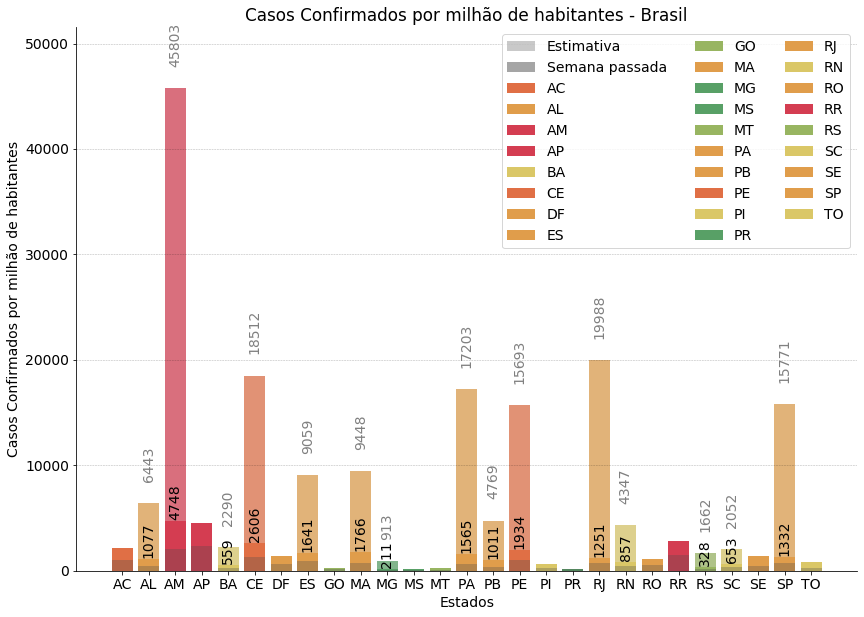

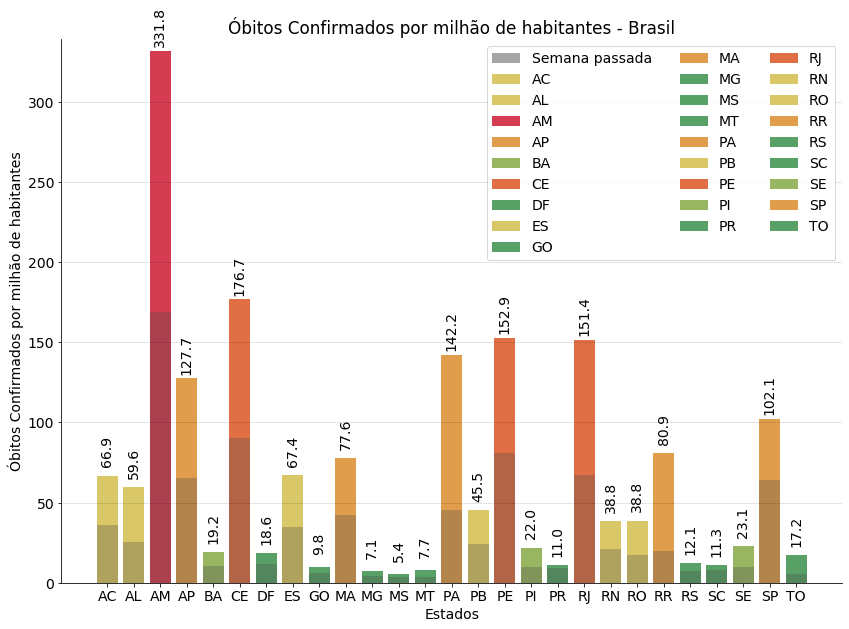

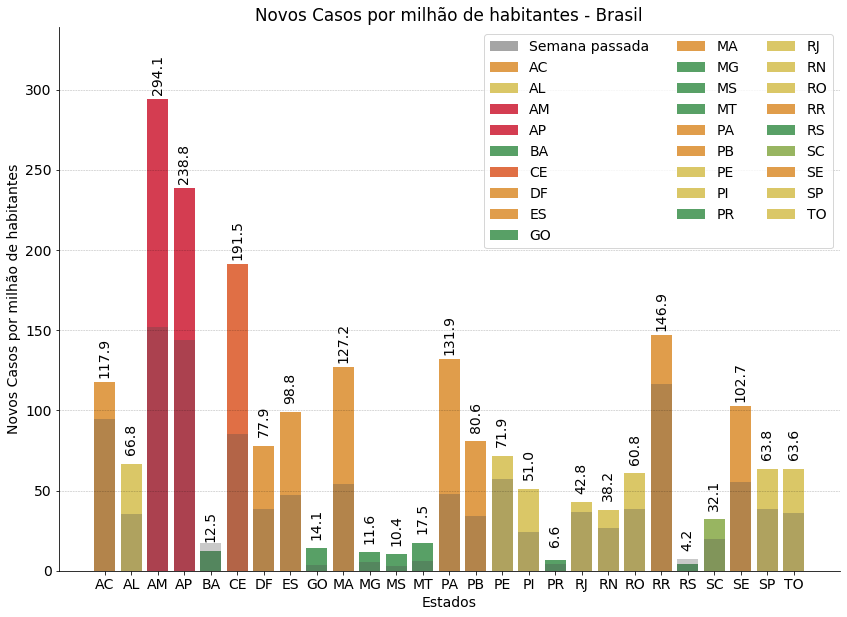

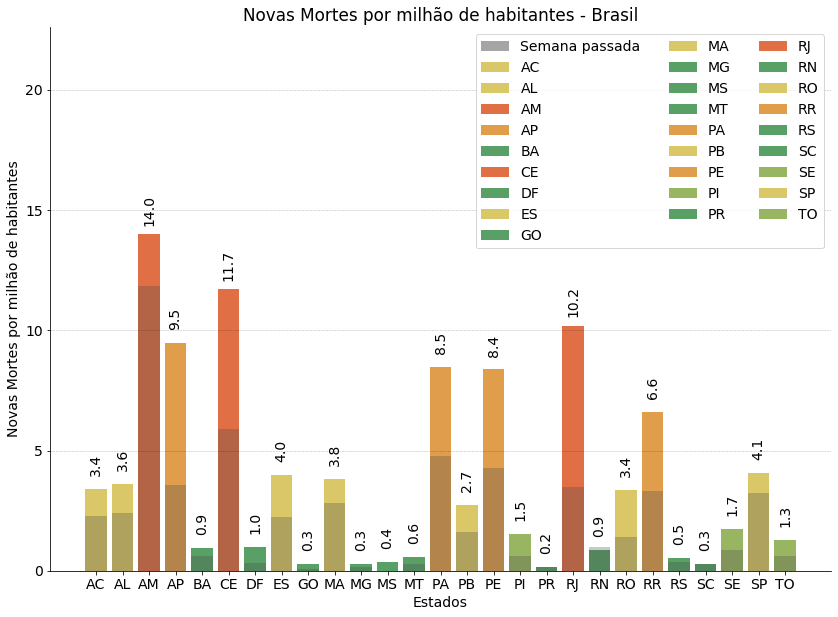

In [11]:
label = ["Estado", "Regiao", "População", "Último Dado", "Data", "Dia", "Casos Confirmados",
         "Óbitos Confirmados", "Novos Casos", "Novas Mortes", "Incidência de Casos", "Mortalidade"]

for f in range(6, 10) :
    plt.ion()    
    plt.rc('font', size=14)
    plt.rcParams['figure.figsize'] = [14, 10]

    plt.gca().spines["top"].set_visible(False)    
    plt.gca().spines["right"].set_visible(False)
    plt.gca().get_xaxis().tick_bottom()    
    plt.gca().get_yaxis().tick_left()
    plt.grid(True, axis = 'y', linestyle = "dashed", lw = 0.5, color = "black", alpha = 0.3)


    estados = list(df_estados.loc[df_estados['is_last'],
                                  ['state']
                                 ].sort_values('state', ascending = True)['state'].unique())

    y_max = [3600, 300, 300, 20]
    yp_max = [3600, 300, 300, 20]
    
    if f == 6 :
        plt.bar(estados[0], 1, label = 'Estimativa', color = (.3, .3, .3, .3))
    
    plt.bar(estados[0], 1, label = 'Semana passada', color = (.3, .3, .3, .5))
    
    for e in range(27) :      
        y = np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                                   :].sort_values('day', ascending = True).iloc[:-1, f].tail(7))
        
        pop = max(df_estados.loc[(df_estados['state'] == estados[e]) & (df_estados['is_last']), 
                                 ['population']].loc[:, 'population'])
        
        IFR = max(df_estados.loc[(df_estados['state'] == estados[e]) & (df_estados['is_last']), ['IFR']].loc[:, 'IFR'])
        
#         if IFR == 0 :
#             IFR = np.median(df_estados.loc[df_estados['is_last'], ['IFR']].loc[:, 'IFR'])
        
        yp = (10 ** 6) * y / pop
        
        yl = np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                                   :].sort_values('day', ascending = True).iloc[:-8, f].tail(14))
        
        ypl = (10 ** 6) * yl / pop

        ratio = yp / y_max[f - 6]
        
        if ratio < .0625 :
            plt.bar(estados[e], yp, label = estados[e], color = color2[-11])
        elif (ratio >= .0625) & (ratio <= .125) :   
            plt.bar(estados[e], yp, label = estados[e], color = color2[-9])
        elif (ratio >= .125) & (ratio <= .25) :
            plt.bar(estados[e], yp, label = estados[e], color = color2[-7])
        elif (ratio >= .25) & (ratio <= .5) :
            plt.bar(estados[e], yp, label = estados[e], color = color2[-5])
        elif (ratio >= .5) & (ratio <= .75) :
             plt.bar(estados[e], yp, label = estados[e], color = color2[-3])
        else  :
            plt.bar(estados[e], yp, label = estados[e], color = color2[-1])
        
        plt.bar(estados[e], ypl, color = (.3, .3, .3, .3))
          
        if (IFR != 0) & (f == 6) :

            ym = (10 ** 6) * np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                                   :].sort_values('day', ascending = True).iloc[:-1, 7].tail(7)) / pop

            if ratio < .0625 :
                plt.bar(estados[e], (99 * ym) / IFR, bottom = yp, color = color2[-11])
            elif (ratio >= .0625) & (ratio <= .125) :   
                plt.bar(estados[e], (99 * ym) / IFR, bottom = yp, color = color2[-9])
            elif (ratio >= .125) & (ratio <= .25) :
                plt.bar(estados[e], (99 * ym) / IFR, bottom = yp, color = color2[-7])
            elif (ratio >= .25) & (ratio <= .5) :
                plt.bar(estados[e], (99 * ym) / IFR, bottom = yp, color = color2[-5])
            elif (ratio >= .5) & (ratio <= .75) :
                 plt.bar(estados[e], (99 * ym) / IFR, bottom = yp, color = color2[-3])
            else  :
                plt.bar(estados[e], (99 * ym) / IFR, bottom = yp, color = color2[-1])           

            plt.bar(estados[e], (99 * ym) / IFR, bottom = yp, color = (.9, .9, .9, .3))
            
            if ((100 * ym) / IFR) > yp_max[f - 6] : 
                yp_max[f - 6] = (110 * ym) / IFR
        
        if (yp != 0) :
            if f != 6 :
                plt.text(estados[e], yp + y_max[f - 6] * .05, str(round(yp, 1)), color = 'black', fontsize = 14,
                         rotation = 'vertical', horizontalalignment = 'center', verticalalignment = 'center')
            elif IFR != 0 :   
                plt.text(estados[e], yp + 100, str(int(round(yp))), color = 'black', fontsize = 14,
                         rotation = 'vertical', horizontalalignment = 'center', verticalalignment = 'bottom')
                plt.text(estados[e], 2000 + yp + (99 * ym) / IFR, str(int(round(yp + (99 * ym) / IFR))),
                         color = 'gray', fontsize = 14, rotation = 'vertical',
                         horizontalalignment = 'center', verticalalignment = 'bottom')

            
    plt.xlabel('Estados')       
    plt.ylim(0, yp_max[f - 6] * 1.13)         
    plt.title(label[f] + " por milhão de habitantes - Brasil")
    plt.legend(loc = 0, ncol = 3)
    plt.ylabel(label[f] + " por milhão de habitantes")
    plt.savefig('Graphics/' + label[f] + " 1M.png")
    plt.show()

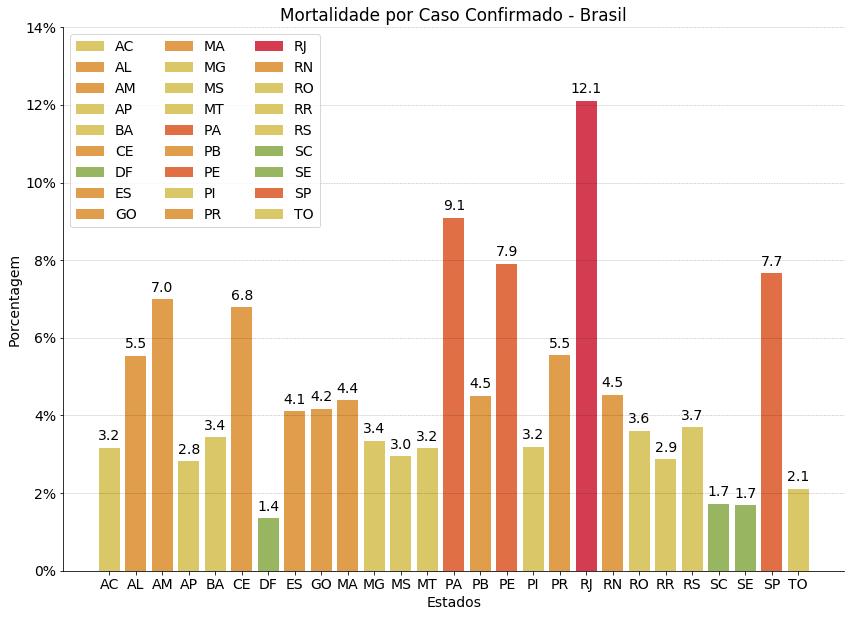

In [12]:
label = ["Estado", "Regiao", "População", "Último Dado", "Data", "Dia", "Casos Confirmados",
         "Óbitos Confirmados", "Novos Casos", "Novas Mortes", "Incidência de Casos", "Mortalidade"]
   
plt.rc('font', size = 14)
plt.rcParams['figure.figsize'] = [14, 10]

plt.gca().spines["top"].set_visible(False)    
plt.gca().spines["right"].set_visible(False)
plt.gca().get_xaxis().tick_bottom()    
plt.gca().get_yaxis().tick_left()
plt.grid(True, axis = 'y', linestyle = "dashed", lw = 0.5, color = "black", alpha = 0.3)


estados = list(df_estados.loc[df_estados['is_last'],
                              ['state']
                             ].sort_values('state', ascending = True)['state'].unique())

y_max = 1

for e in range(27) :      
    y = np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                               :].sort_values('day', ascending = True).iloc[:-1, 7].tail(7))
    
    yc = np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                               :].sort_values('day', ascending = True).iloc[:-1, 6].tail(7))

    ymor = y / yc

    ratio = ymor / 0.15

    if ratio < .0625 :
        plt.bar(estados[e], ymor, label = estados[e], color = color2[-11])
    elif (ratio >= .0625) & (ratio <= .125) :   
        plt.bar(estados[e], ymor, label = estados[e], color = color2[-9])
    elif (ratio >= .125) & (ratio <= .25) :
        plt.bar(estados[e], ymor, label = estados[e], color = color2[-7])
    elif (ratio >= .25) & (ratio <= .5) :
        plt.bar(estados[e], ymor, label = estados[e], color = color2[-5])
    elif (ratio >= .5) & (ratio <= .75) :
         plt.bar(estados[e], ymor, label = estados[e], color = color2[-3])
    else  :
        plt.bar(estados[e], ymor, label = estados[e], color = color2[-1])
    
    if ymor != 0 :   
        plt.text(estados[e], ymor + .003, str(round(ymor * 100, 1)), color = 'black', 
                 fontsize = 14, horizontalalignment = 'center', verticalalignment = 'center')
    
plt.yticks(np.arange(0, .15, .02), 
           [str(x) + "%" for x in np.arange(0, 15, 2)], fontsize = 14)        
        
plt.xlabel('Estados')       
plt.ylim(0, 0.14)         
plt.title("Mortalidade por Caso Confirmado - Brasil")
plt.legend(loc = 0, ncol = 3)
plt.ylabel("Porcentagem")
plt.savefig("Graphics/ Mortalidade.png")
plt.show()

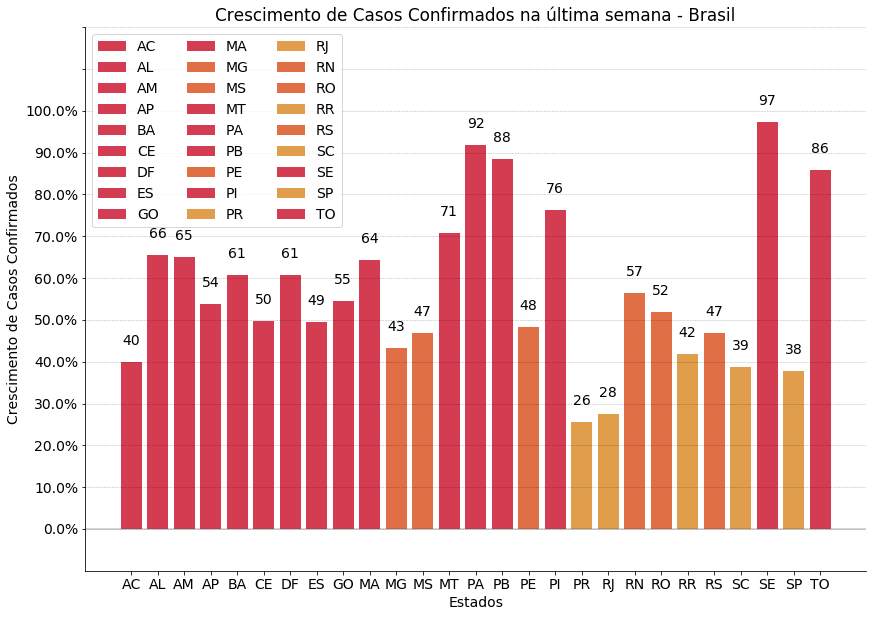

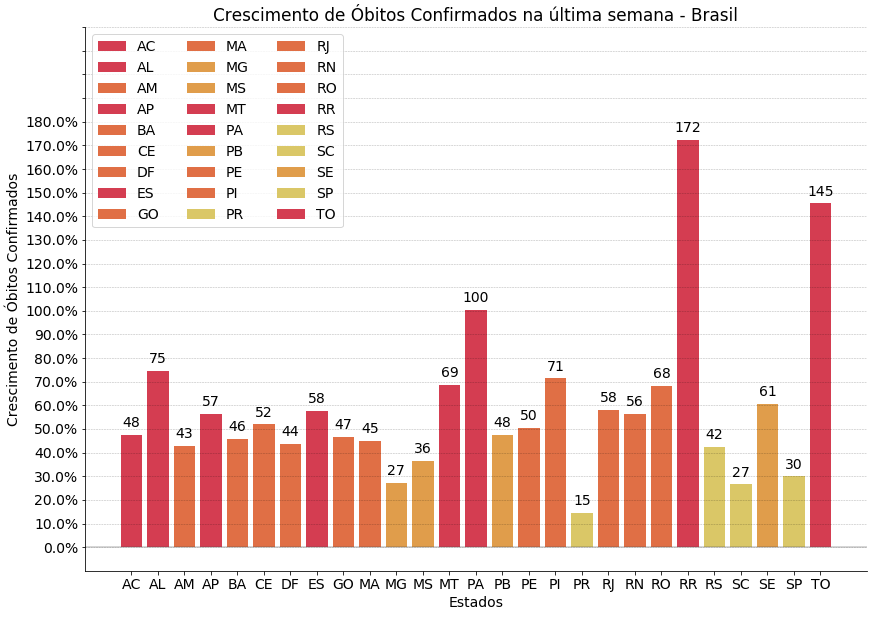

E:\Users\Charles\anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in double_scalars


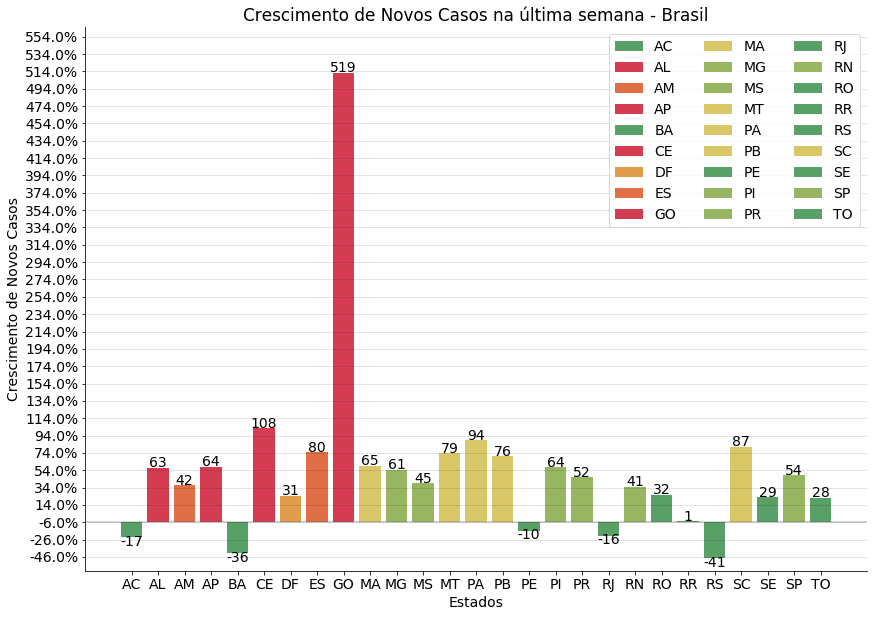

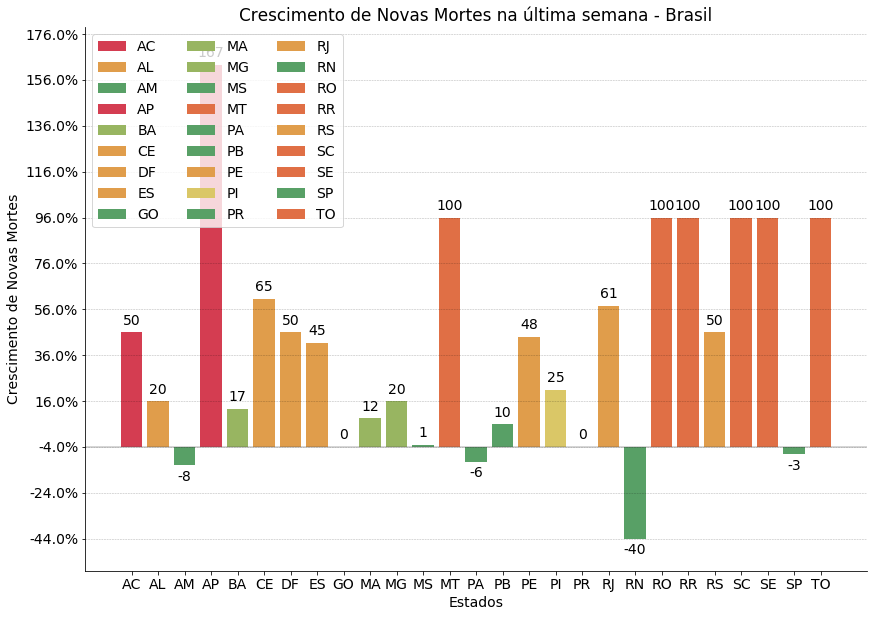

In [13]:
label = ["Estado", "Regiao", "População", "Último Dado", "Data", "Dia", "Casos Confirmados",
         "Óbitos Confirmados", "Novos Casos", "Novas Mortes", "Incidência de Casos", "Mortalidade"]

for f in range(6, 10) :
        
    plt.rc('font', size=14)
    plt.rcParams['figure.figsize'] = [14, 10]

    plt.gca().spines["top"].set_visible(False)    
    plt.gca().spines["right"].set_visible(False)
    plt.gca().get_xaxis().tick_bottom()    
    plt.gca().get_yaxis().tick_left()
    plt.grid(True, axis = 'y', linestyle = "dashed", lw = 0.5, color = "black", alpha = 0.3)


    estados = list(df_estados.loc[df_estados['is_last'],
                                  ['state']
                                 ].sort_values('state', ascending = True)['state'].unique())

    yr_max = 0
    yr_min = 0

    for e in range(27) :      
        y = np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                                   :].sort_values('day', ascending = True).iloc[:-1, f].tail(7))
        yl = np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                                   :].sort_values('day', ascending = True).iloc[:-8, f].tail(7))    
        
        if yl != 0 :
            yr = (100 * y / yl) - 100
        else : 
            yr = (10 * y / 1) - 10
            if yr == 0 :
                yr = 1

        if yr > yr_max :
            yr_max = yr
        if yr < yr_min :
            yr_min = yr
        
        ratio = yr / yr_max
        
        if ratio < .0625 :
            plt.bar(estados[e], yr, label = estados[e], color = color2[-11])
        elif (ratio >= .0625) & (ratio <= .125) :   
            plt.bar(estados[e], yr, label = estados[e], color = color2[-9])
        elif (ratio >= .125) & (ratio <= .25) :
            plt.bar(estados[e], yr, label = estados[e], color = color2[-7])
        elif (ratio >= .25) & (ratio <= .5) :
            plt.bar(estados[e], yr, label = estados[e], color = color2[-5])
        elif (ratio >= .5) & (ratio <= .75) :
             plt.bar(estados[e], yr, label = estados[e], color = color2[-3])
        else  :
            plt.bar(estados[e], yr, label = estados[e], color = color2[-1])
        
        if yr != 0 :   
            plt.text(estados[e], yr + 5 * (yr / abs(yr)), str(int(round(yr))), color = 'black', 
                     fontsize = 14, horizontalalignment = 'center', verticalalignment = 'center')
        else :
            plt.text(estados[e], 5, str(int(round(yr))), color = 'black', 
                     fontsize = 14, horizontalalignment = 'center', verticalalignment = 'center')
            
    plt.ylim(round(yr_min * 1.1) - 10, round(yr_max * 1.1))    

    
    if f in [6, 7] :
        plt.yticks(np.arange(0, round(yr_max * 1.3), 10), 
                   [str(x) + "%" for x in np.arange(round(yr_min * 1.1), round(yr_max * 1.1), 10)], fontsize = 14)
    else :
        plt.yticks(np.arange(-40, round(yr_max * 1.1), 20), 
                   [str(x) + "%" for x in np.arange(round(yr_min * 1.1), round(yr_max * 1.1), 20)], fontsize = 14)
        
    plt.axhline(color = (.3, .3, .3, .3), lw = 1.5)
    plt.title("Crescimento de " + label[f] + " na última semana - Brasil")
    plt.legend(ncol = 3)
    plt.xlabel('Estados')
    plt.ylabel('Crescimento de ' + label[f])
    plt.savefig('Graphics/' + label[f] + " semana.png")
    plt.show()

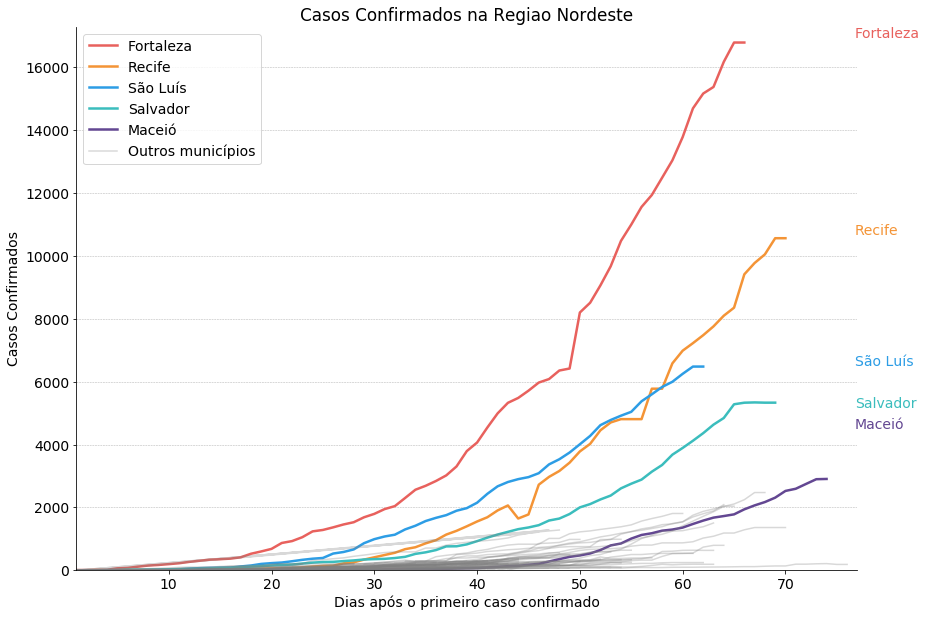

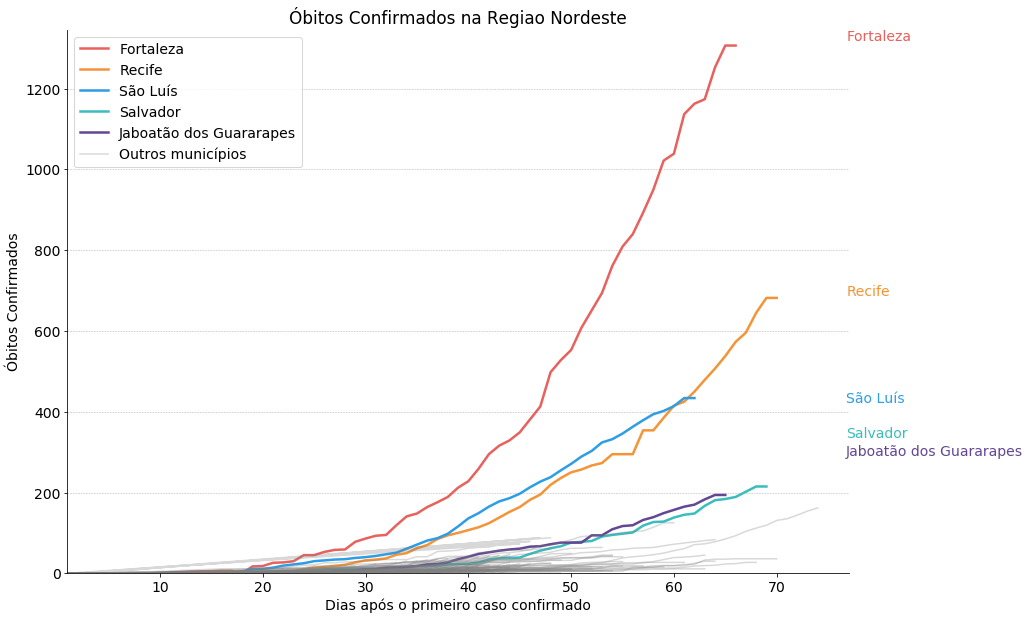

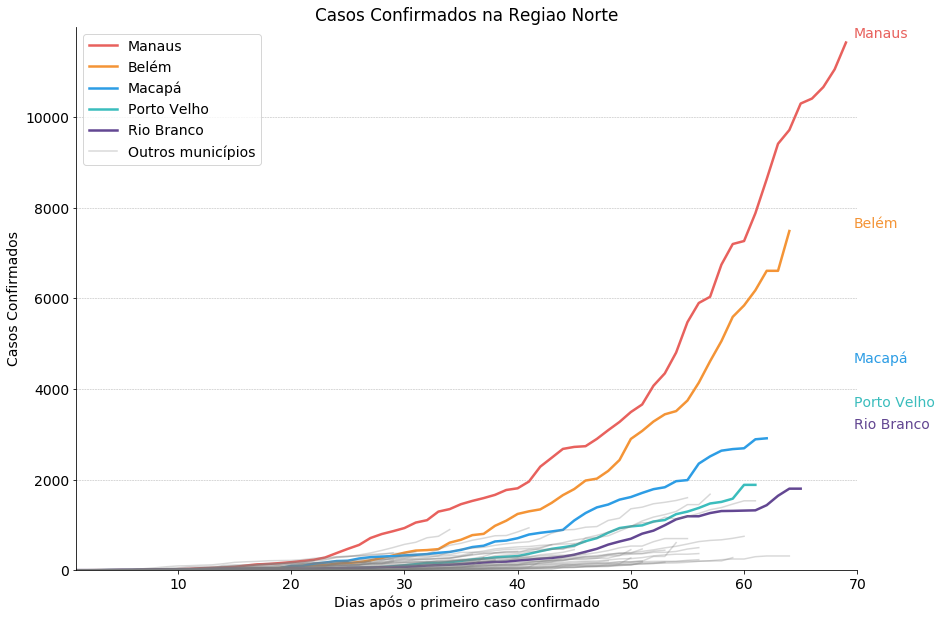

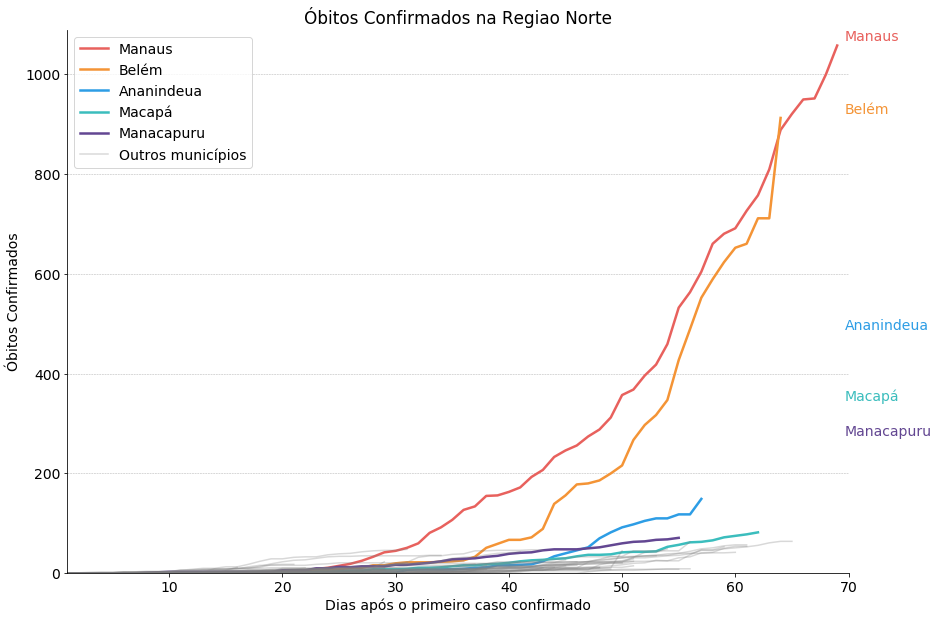

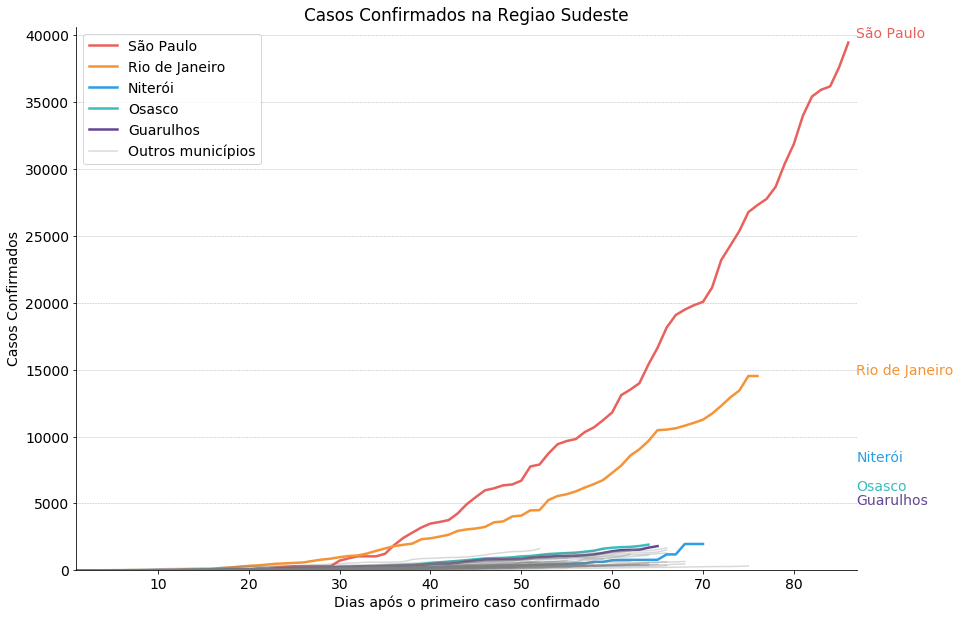

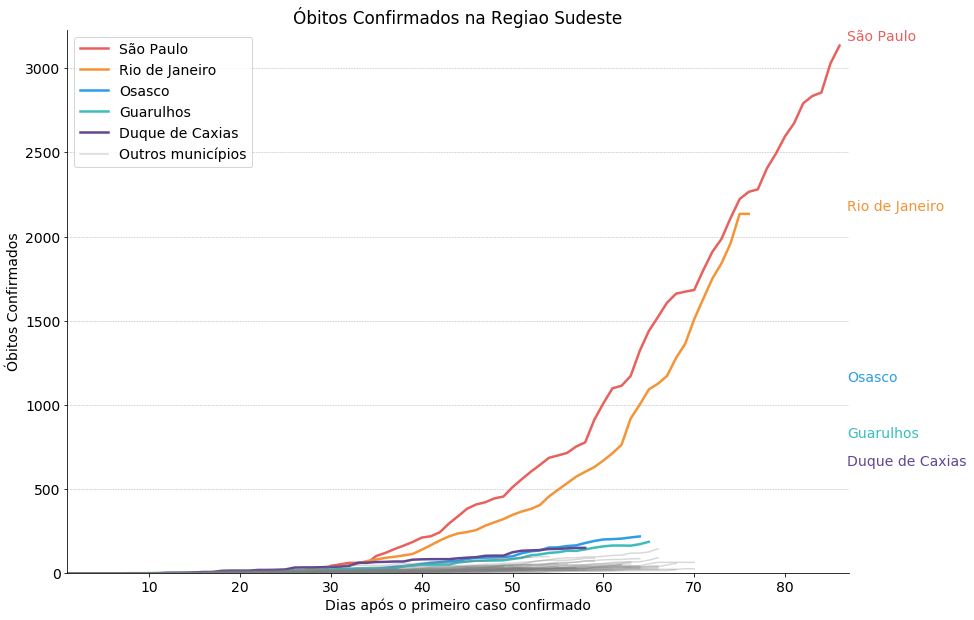

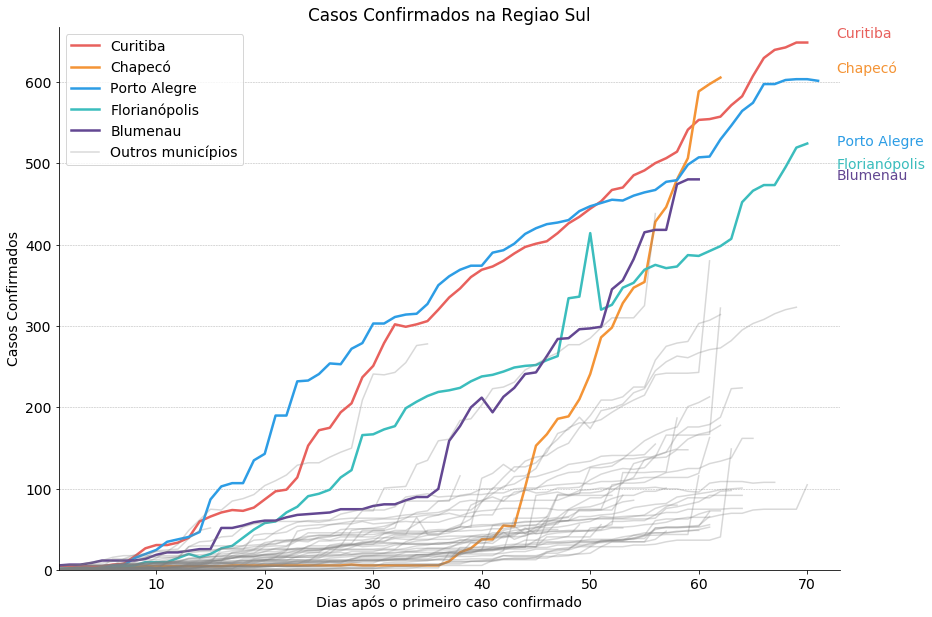

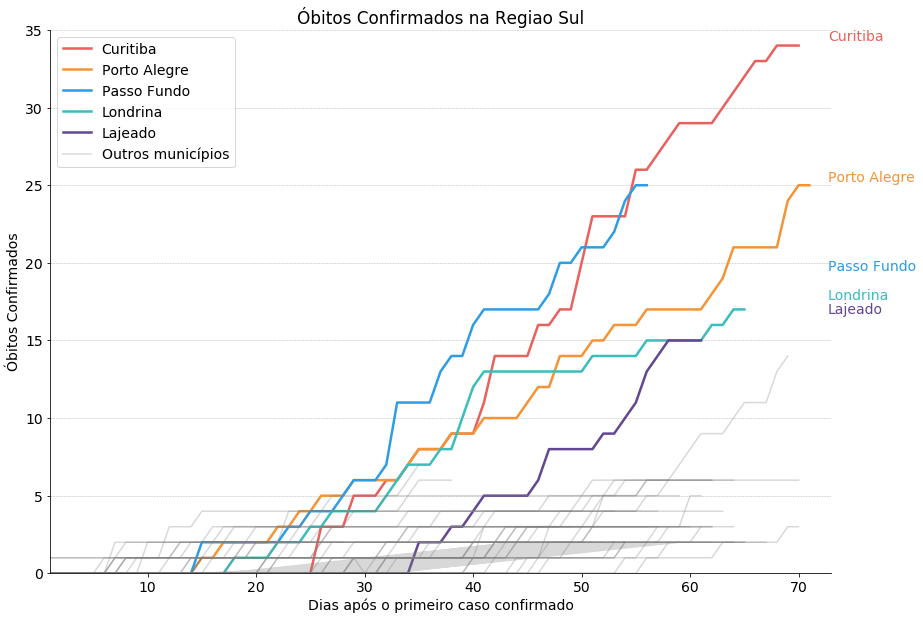

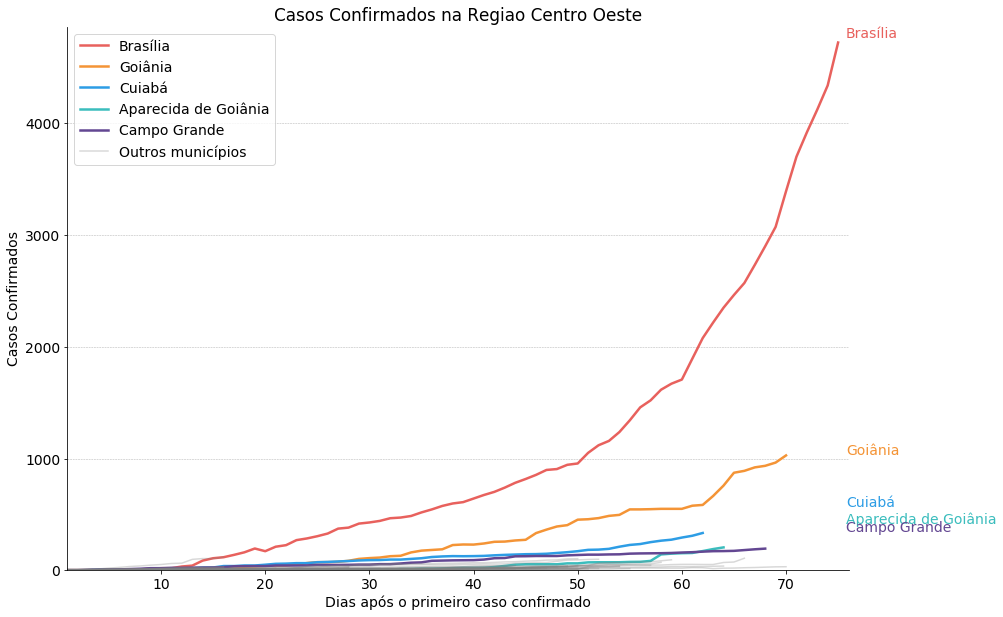

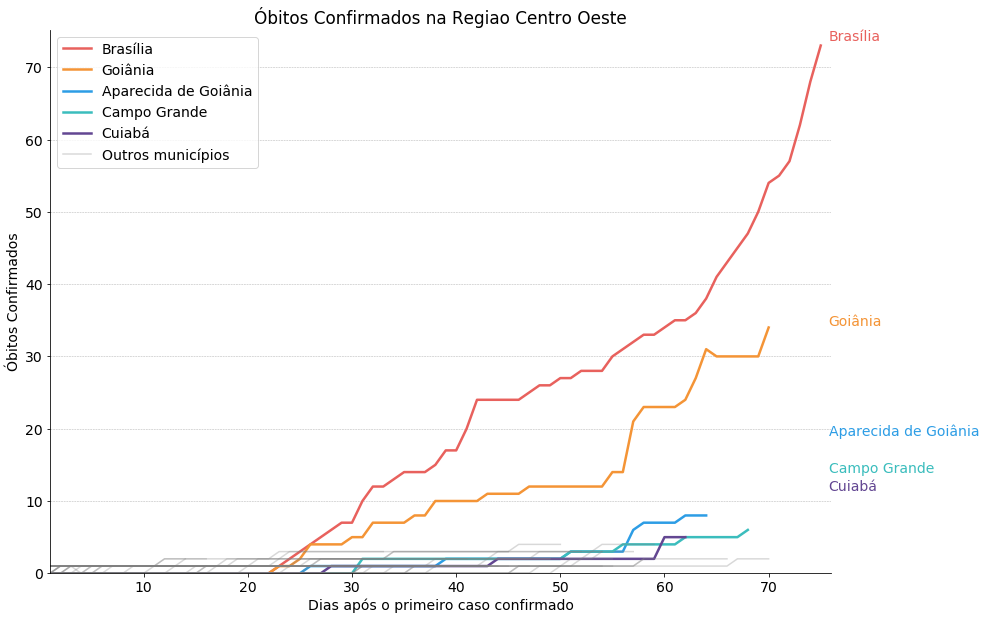

In [14]:
label = ["Cidade", "Estado", "Região", "População", "Último dado", "Data", "dia", "Casos Confirmados", 
           "Óbitos Confirmados", "Novos Casos", "Novas Mortes", "Incidência de Casos", "Mortalidade"]

reg = ['Nordeste', 'Norte', 'Sudeste', 'Sul', 'Centro Oeste']

for r in range(5) :
    for f in range(7, 9) :     
        plt.rc('font', size = 14)
        plt.rcParams['figure.figsize'] = [14, 10]
        plt.tick_params(axis = "both", which = "both", bottom = "off", top = "off",    
                        labelbottom = "on", left = "off", right = "off", labelleft = "on")
        
        plt.grid(True, axis = 'y', linestyle = "dashed", lw = 0.5, color = "black", alpha = 0.3)
        plt.gca().spines["top"].set_visible(False)    
        plt.gca().spines["right"].set_visible(False)
        plt.gca().get_xaxis().tick_bottom()    
        plt.gca().get_yaxis().tick_left()
        
        dia = max(df_cidades[(df_cidades['region'] == reg[r])].loc[:, 'day'])
        
        x_max = dia
        y_max = 0
        
        Regiao_c = list(df_cidades[(df_cidades['region'] == reg[r]) &
                           (df_cidades['is_last'])].sort_values(df_cidades.columns[f],
                                                                ascending = False)['city'].unique())

        y_max = max(df_cidades.loc[(df_cidades['region'] == reg[r]) &
                                    (df_cidades['city'] == Regiao_c[0]), df_cidades.columns[f]])
        y_med = max(df_cidades.loc[(df_cidades['region'] == reg[r]) &
                                    (df_cidades['city'] == Regiao_c[1]), df_cidades.columns[f]])
        y_min = max(df_cidades.loc[(df_cidades['region'] == reg[r]) &
                                    (df_cidades['city'] == Regiao_c[5]), df_cidades.columns[f]])

        for c in range(len(Regiao_c)) : 
            # Real data
            x = list(df_cidades.loc[(df_cidades['region'] == reg[r]) & 
                                    (df_cidades['city'] == Regiao_c[c]), 'day'])
            y = list(df_cidades.loc[(df_cidades['region'] == reg[r]) &
                                    (df_cidades['city'] == Regiao_c[c]), df_cidades.columns[f]])

            if (c > 5) & (c < 50) :
                plt.plot(x, y, marker = ' ', color = (.5, .5, .5, .3), lw = 1.5)
            elif c == 5 :
                plt.plot(x, y, marker = ' ', label = 'Outros municípios', color = (.5, .5, .5, .3), lw = 1.5)
            elif (c >= 2) & (c < 5) :
                plt.plot(x, y, marker = ' ', label = Regiao_c[c], color = color[c], lw = 2.5)
                ys = y_min + (y_med - y_min) / c
                plt.text(x_max * 1.01, ys, Regiao_c[c], color = color[c], fontsize = 14)
            elif (c < 2):
                plt.plot(x, y, marker = ' ', label = Regiao_c[c], color = color[c], lw = 2.5)
                plt.text(x_max * 1.01, y[-1] * 1.01, Regiao_c[c], color = color[c], fontsize = 14)
                

        plt.xlim(1, x_max + 1)
        plt.ylim(0, y_max * 1.03)
        plt.xlabel("Dias após o primeiro caso confirmado")
        plt.title(label[f] + " na Regiao " + reg[r])
        plt.legend(loc = 2)
        plt.ylabel(label[f])
        plt.savefig('Graphics/' + label[f] + " - " + reg[r] + ".png")
        plt.show()

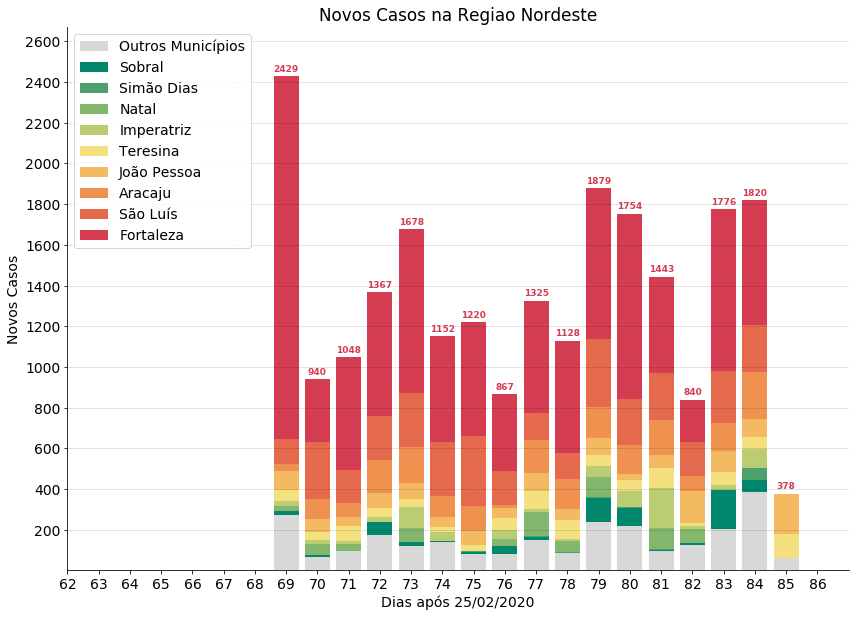

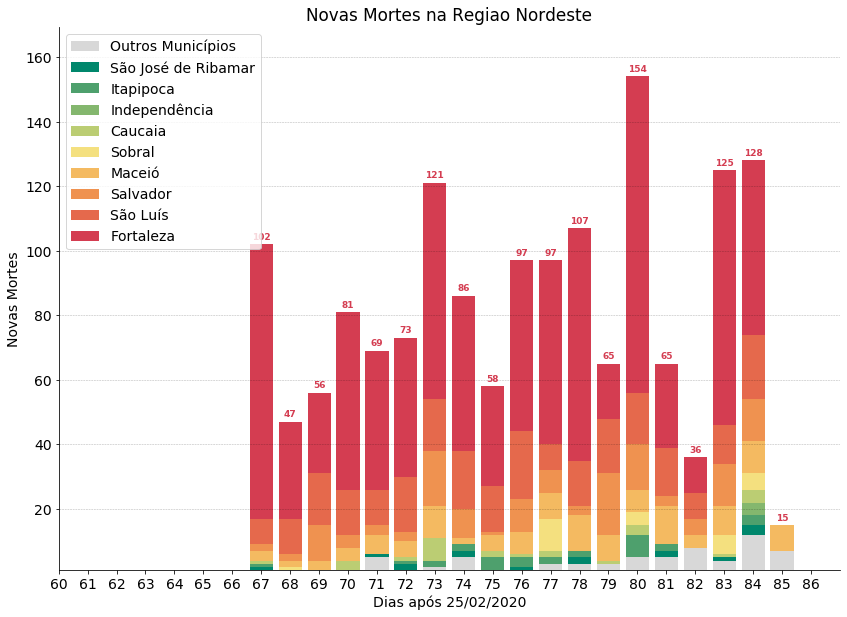

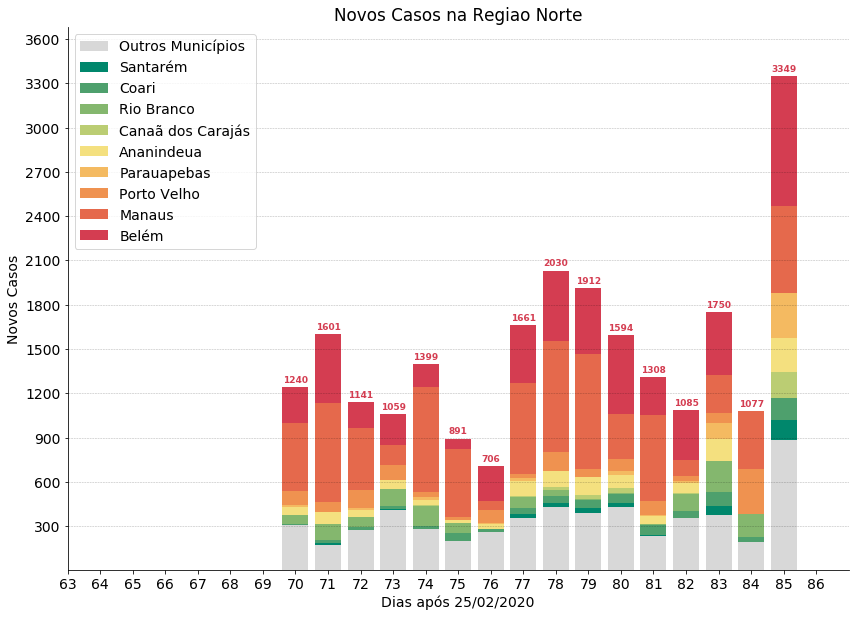

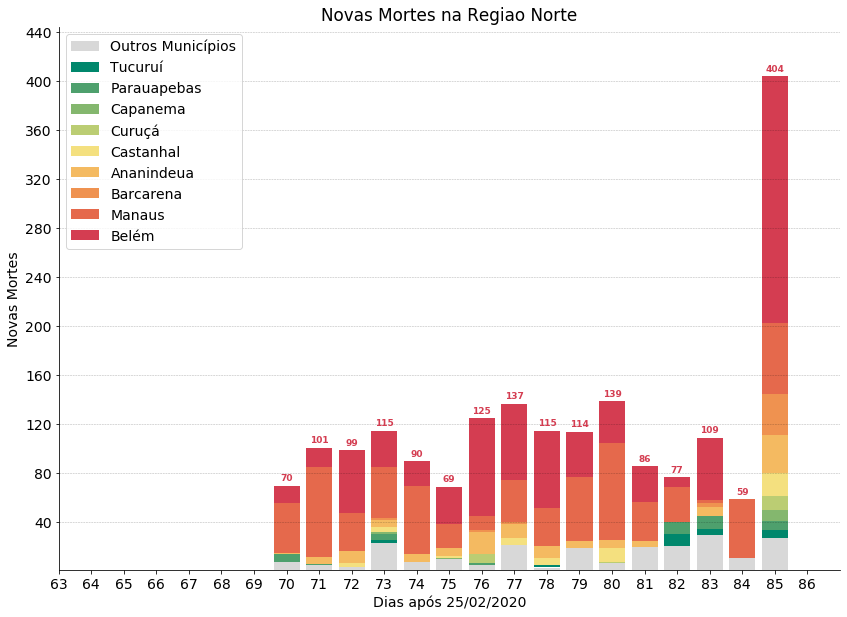

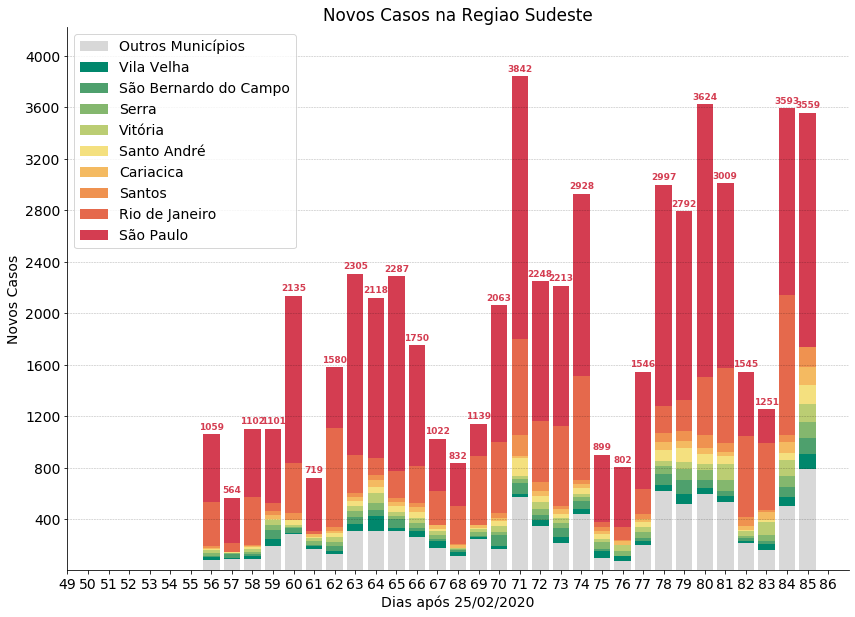

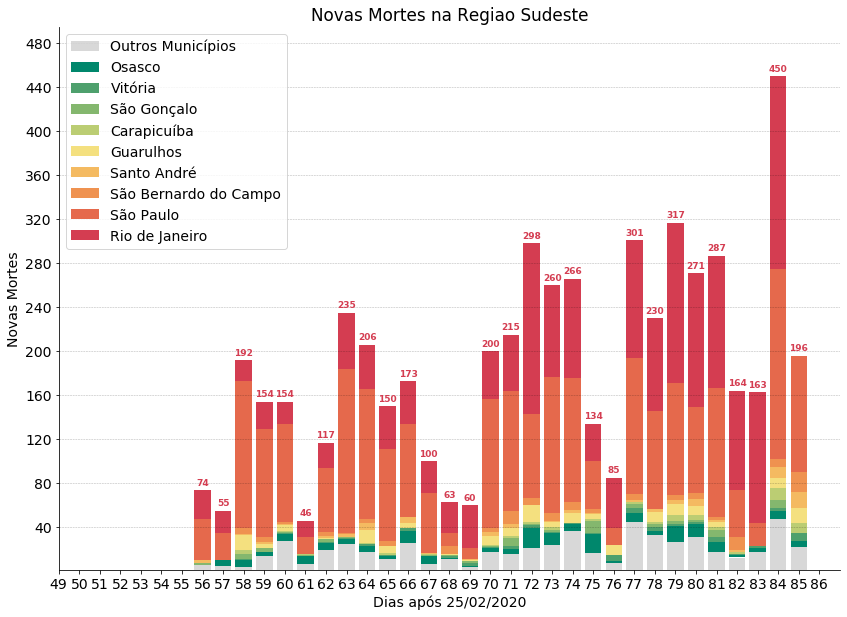

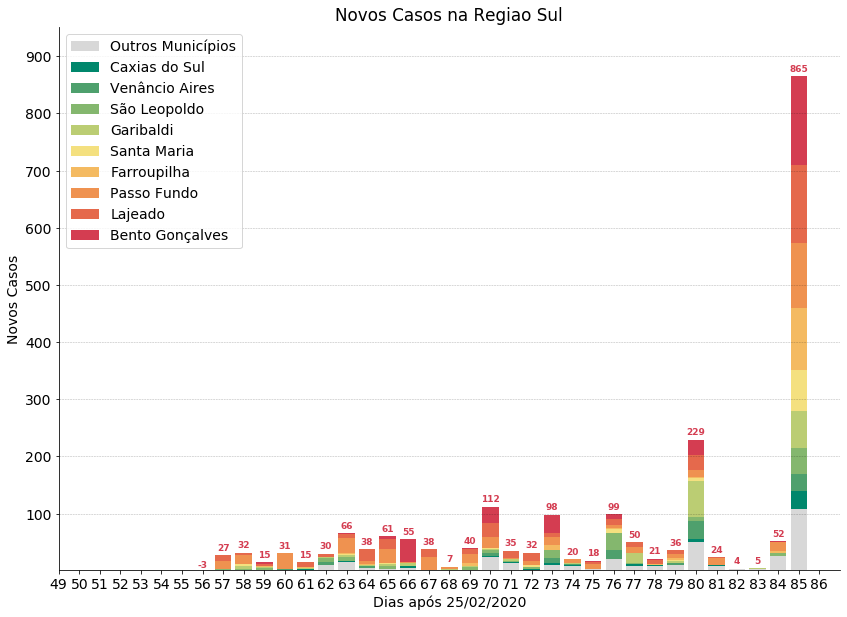

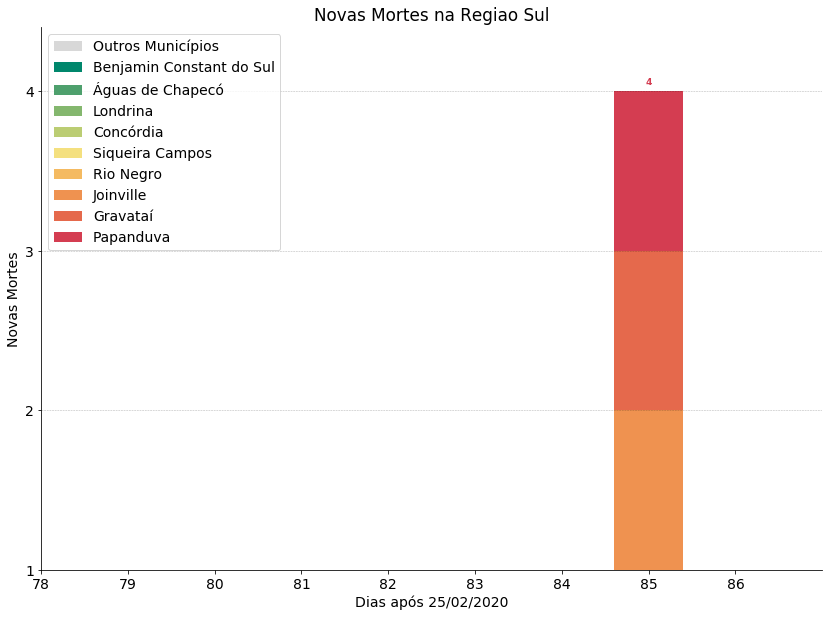

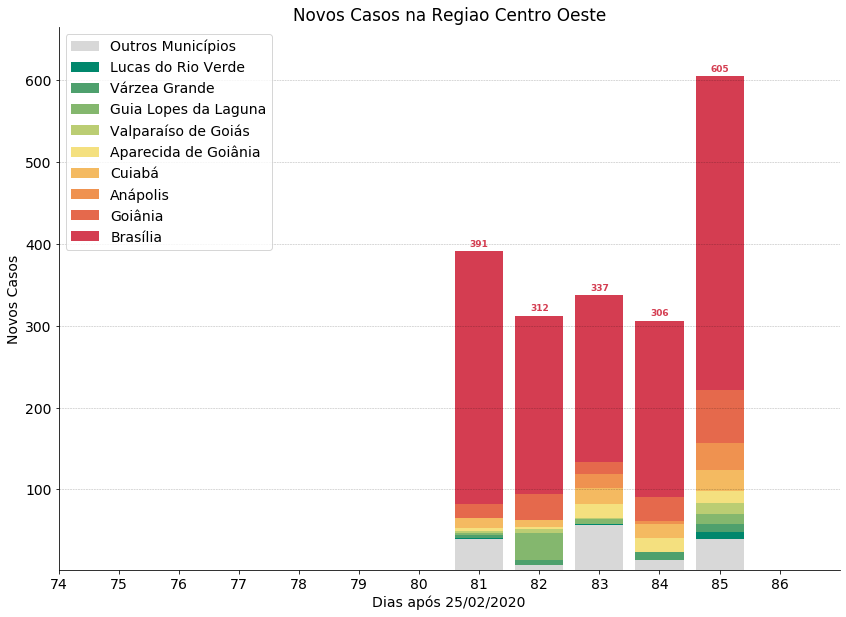

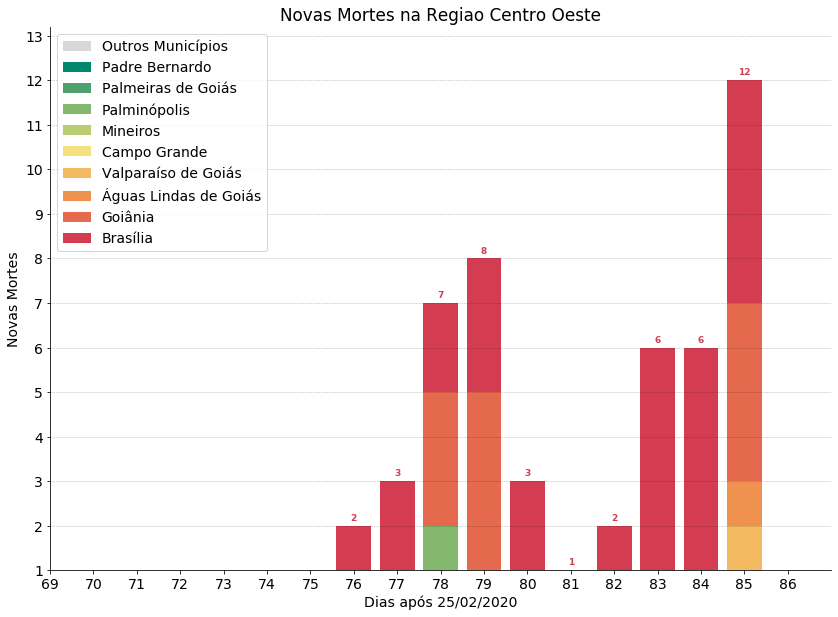

In [15]:
label = ["Cidade", "Estado", "Região", "População", "Último dado", "Data", "dia", "Casos Confirmados", 
           "Óbitos Confirmados", "Novos Casos", "Novas Mortes", "Incidência de Casos", "Mortalidade"]

reg = ['Nordeste', 'Norte', 'Sudeste', 'Sul', 'Centro Oeste']

dia = len(df_Brasil.index)

for r in range(5) :
    for f in range(9, 11) :          
        plt.rc('font', size = 14)
        plt.rcParams['figure.figsize'] = [14, 10]
        plt.tick_params(axis = "both", which = "both", bottom = "off", top = "off",    
                        labelbottom = "on", left = "off", right = "off", labelleft = "on")
        
        plt.grid(True, axis = 'y', linestyle = "dashed", lw = 0.5, color = "black", alpha = 0.3)
        plt.gca().spines["top"].set_visible(False)    
        plt.gca().spines["right"].set_visible(False)
        plt.gca().get_xaxis().tick_bottom()    
        plt.gca().get_yaxis().tick_left()

        Regiao_c = list(df_cidades[(df_cidades['region'] == reg[r]) & (df_cidades['is_last'])
                                  ].sort_values(df_cidades.columns[f], ascending = True)['city'].unique())

        c_num = [[21, 21, 21, 15, 15], [15, 15, 21, 15, 15]]
        first = len(Regiao_c) - c_num[f - 9][r]
      
        x_min = dia
        
        for a in range(first, len(Regiao_c)) :
            temp = len(list(df_cidades.loc[(df_cidades['region'] == reg[r]) & (df_cidades['city'] == Regiao_c[a]), 
                                       df_cidades.columns[f]]))
            if temp < x_min :
                x_min = temp
            if x_min > 30 :
                x_min = 30

        x_max = dia + 1
        y_max = 0

        x = list(range(dia - x_min, dia))
        
        prev = list(df_cidades.loc[(df_cidades['region'] == reg[r]) &
                                   (df_cidades['city'] == Regiao_c[first]), 
                                   df_cidades.columns[f]].tail(x_min).reset_index(drop = True))

        for c in range(first, len(Regiao_c)) : 
            if c == first :
                plt.bar(x, prev, label = 'Outros Municípios', color = (.5, .5, .5, .3))
                yfirst = prev
                
            y = list(df_cidades.loc[(df_cidades['region'] == reg[r]) & (df_cidades['city'] == Regiao_c[c]),
                                    df_cidades.columns[f]].tail(x_min).reset_index(drop = True))                  
                
            if c == len(Regiao_c) - len(color3):    
                plt.bar(x, prev, bottom = yfirst, color = (.5, .5, .5, .3))
            if c >= len(Regiao_c) - len(color3):
                plt.bar(x, y, bottom = prev, label = Regiao_c[c], color = color3[c - len(Regiao_c)])
                
                
            
            prev = [sum(i) for i in zip(y, prev)]

            if max(prev) > y_max :
                y_max = max(prev)
                
        for i, v in enumerate(prev):
            plt.text(i + (dia - x_min), v + (y_max * 0.01), str(v), color = color3[c - len(Regiao_c)],
                     fontsize = 9, fontweight = 'bold', horizontalalignment = 'center')
        
        plt.xticks(np.arange(dia - x_min - 7, x_max, 1))
        ytick = round(y_max * .001) * 100
        
        if ytick == 0 :
            ytick = round(y_max * .01) * 10
            if ytick == 0 :
                ytick = 1
            
        plt.yticks(np.arange(0, y_max * 1.1, ytick))   

        plt.xlim(dia - x_min - 7, x_max)
        plt.ylim(1, y_max * 1.1)
        plt.title(label[f] + " na Regiao " + reg[r])
        plt.xlabel("Dias após 25/02/2020")
        plt.legend(loc = 2, ncol = 1)
        plt.ylabel(label[f])
        plt.savefig('Graphics/' + label[f] + " - " + reg[r] + ".png")
        plt.show()

In [16]:
#df_cidades.loc[(df_cidades['region'] == reg[r]) & (df_cidades['city'] == Regiao_c[c]), df_cidades.columns[f]].tail(x_min).reset_index(drop = True)
print(len(x), len(y), len(prev), x_min, len(Regiao_c), len(color3))

10 10 10 10 215 9


df_hoje = df1.loc[(df["is_last"] == True), :].drop(['date', 'is_last'], axis = 1)
df_hoje = df_hoje.loc[(df_hoje["place_type"] == 'city'), :]
df_hoje = df_hoje.loc[(df_hoje["city"] != 'Importados/Indefinidos'), :]
df_hoje['city_ibge_code'] = df_hoje['city_ibge_code'].astype(int).astype(str)

m = folium.Map(
    name = 'COVID19 Brasil',
    width = 800, height = 500,
    location = [-15.77972, -47.92972], #[-7, -36.75], # centro paraiba 
    zoom_start = 4,
    min_zoom = 3,
    max_zoom = 18,
    tiles = 'Mapbox Bright'#'cartodbpositron'
)

m.choropleth(
    geo_data = geo,
    name = 'Casos Confirmados',
    data = df_hoje,
    columns = ['city_ibge_code', 'confirmed'],
    key_on = 'feature.properties.id',
    fill_color = 'YlOrRd',
    fill_opacity = 0.7,
    nan_fill_color = 'gray',
    nan_fill_opacity = 0.1,
    line_opacity = 0.0,
    legend_name = 'Casos Confirmados',
    legend_fontsize = '14',
    bins = [0, 10, 100, 1000, 10000, 100000]
)

m.choropleth(
    geo_data = geo,
    name = 'Óbitos Confirmados',
    data = df_hoje,
    columns = ['city_ibge_code', 'deaths'],
    key_on = 'feature.properties.id',
    fill_color = 'Reds',
    fill_opacity = 0.7,
    nan_fill_color = 'gray',
    nan_fill_opacity = 0.1,
    line_opacity = 0.0,
    legend_name = 'Óbitos Confirmados',
    legend_fontsize = '14',
    bins = [0, 1, 10, 100, 1000, 10000],
    show = False
)

m.choropleth(
    geo_data = geo,
    name = 'Casos Confirmados por 100 mil habitantes',
    data = df_hoje,
    columns = ['city_ibge_code', 'incidence'],
    key_on = 'feature.properties.id',
    fill_color = 'PuRd',
    fill_opacity = 0.7,
    nan_fill_color = 'gray',
    nan_fill_opacity = 0.1,
    line_opacity = 0.0,
    legend_name = 'Casos Confirmados por 100 mil habitantes',
    legend_fontsize = '14',
    bins = [0, 1, 10, 100, 1000, 2000],
    show = False
)

bins = list(df_hoje['death_rate'].quantile([0, .125, .25, .375, .5, .625, .75, .875, 1]))
m.choropleth(
    geo_data = geo,
    name = 'Mortalidade',
    data = df_hoje,
    columns = ['city_ibge_code', 'death_rate'],
    key_on = 'feature.properties.id',
    fill_color = 'RdPu',
    fill_opacity = 0.7,
    nan_fill_color = 'gray',
    nan_fill_opacity = 0.1,
    line_opacity = 0.0,
    legend_name = 'Mortalidade',
    legend_fontsize = '14',
    bins = bins,
    show = False
)
folium.LayerControl(name = 'COVID19 Brasil').add_to(m)

m.save('mapa.html')
m

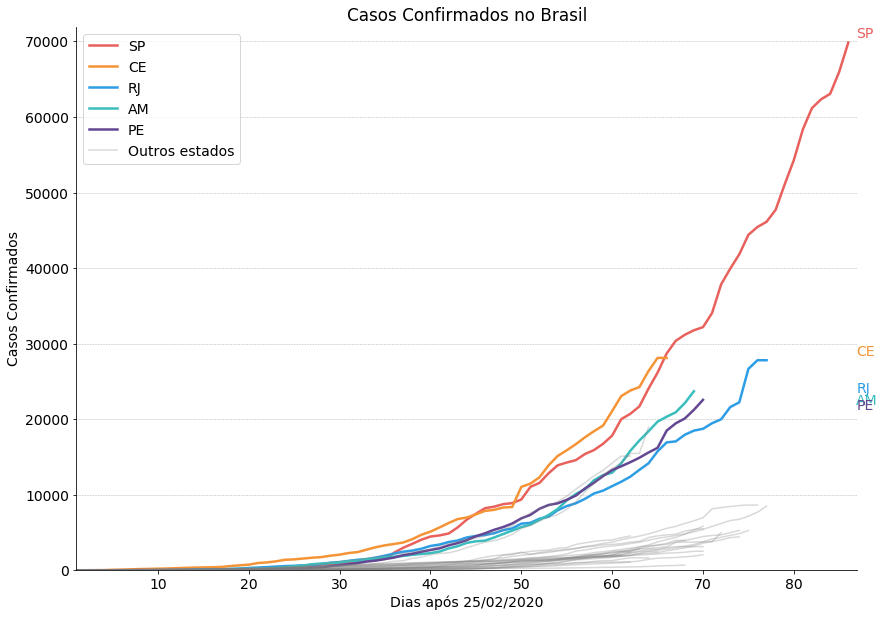

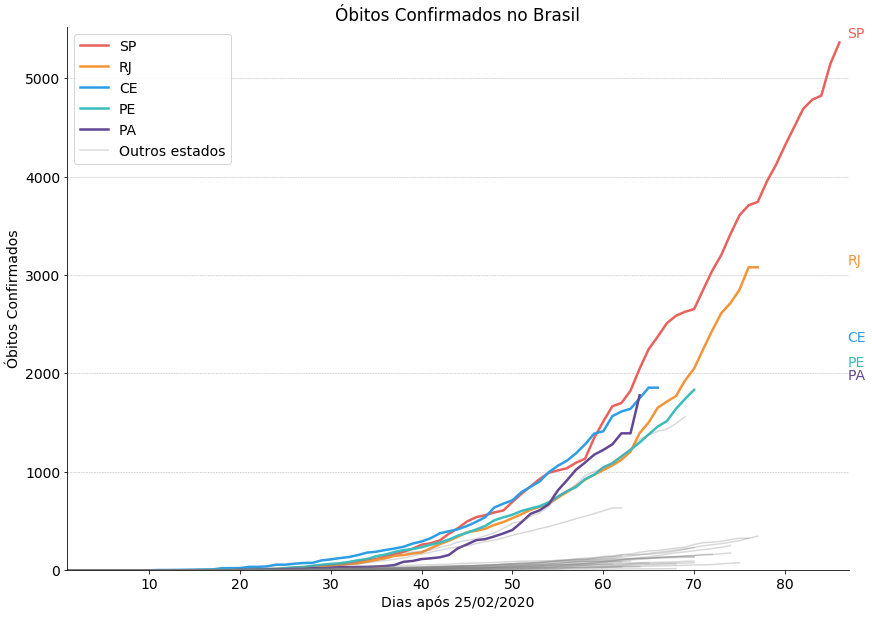

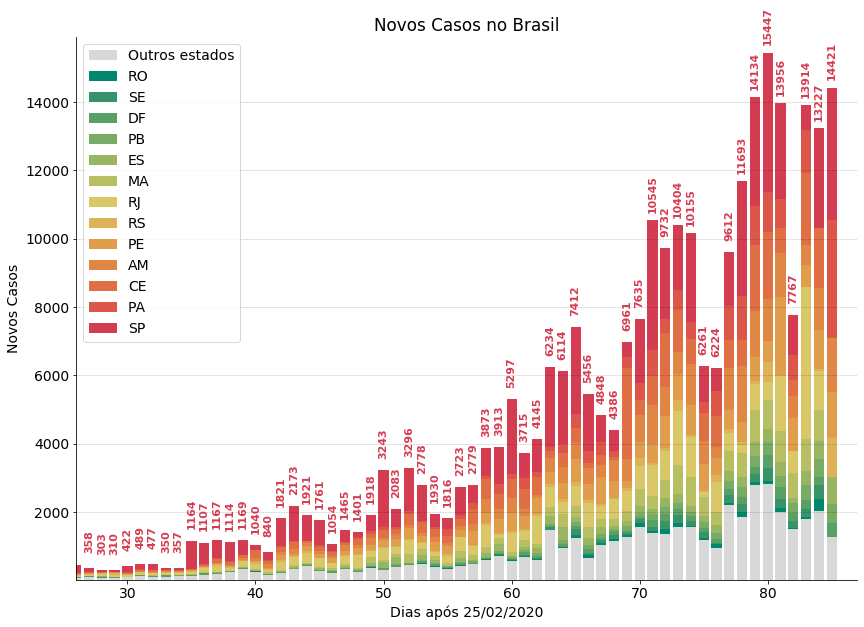

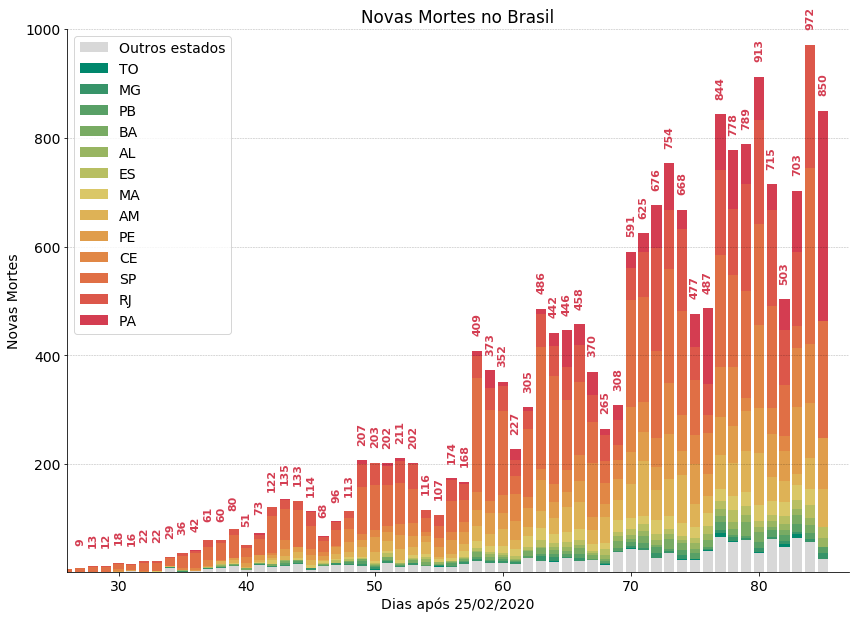

In [17]:
label = ["Estado", "Região", "População", "Último Dado", 'Data', "Dia", "Casos Confirmados", "Óbitos Confirmados",
         "Novos Casos", "Novas Mortes", "Incidência de Casos", "Mortalidade"]
reg = ['Nordeste', 'Norte', 'Sudeste', 'Sul', 'Centro Oeste']

for f in range(6, 10) :
    
    dia = max(df_estados.loc[:, 'day'])
    x_max = dia
    
    plt.rc('font', size = 14)
    plt.rcParams['figure.figsize'] = [14, 10]
    plt.tick_params(axis = "both", which = "both", bottom = "off", top = "off",    
                    labelbottom = "on", left = "off", right = "off", labelleft = "on")

    plt.grid(True, axis = 'y', linestyle = "dashed", lw = 0.5, color = "black", alpha = 0.3)
    plt.gca().spines["top"].set_visible(False)    
    plt.gca().spines["right"].set_visible(False)
    plt.gca().get_xaxis().tick_bottom()    
    plt.gca().get_yaxis().tick_left() 

    if f in [6, 7] :
        
        estados = list(df_estados.loc[df_estados['is_last'],
                                      ['state', df_estados.columns[f]]
                                     ].sort_values(df_estados.columns[f], ascending = False)['state'].unique())

        y_max = 0
        
        for e in range(27) :
            # Real data
            x = list(df_estados.loc[df_estados['state'] == estados[e], 'day'])
            y = list(df_estados.loc[df_estados['state'] == estados[e], df_estados.columns[f]])

            y_max = max(df_estados.loc[df_estados['state'] == estados[0], df_estados.columns[f]])
            y_med = max(df_estados.loc[df_estados['state'] == estados[1], df_estados.columns[f]])
            y_min = max(df_estados.loc[df_estados['state'] == estados[5], df_estados.columns[f]])

            ytab = [1.01, 1.1, 1, 1, .8]

            if (e > 5) :
                plt.plot(x, y, marker = ' ', color = (.5, .5, .5, .3), lw = 1.5)
            elif e == 5 :
                plt.plot(x, y, marker = ' ', label = 'Outros estados', color = (.5, .5, .5, .3), lw = 1.5)
            elif (e >= 2) & (e < 5) :
                plt.plot(x, y, marker = ' ', label = estados[e], color = color[e], lw = 2.5)
                ys = y_min + (y_med - y_min) / e
                plt.text(x_max * 1.01, ys, estados[e], color = color[e], fontsize = 14)
            elif (e < 2):
                plt.plot(x, y, marker = ' ', label = estados[e], color = color[e], lw = 2.5)
                plt.text(x_max * 1.01, y[-1] * 1.01, estados[e], color = color[e], fontsize = 14)

            plt.xlim(1, x_max + 1)
            plt.ylim(0, y_max * 1.03)
            
    else :   
        estados = list(df_estados.loc[df_estados['is_last'], 
                                      ['state', df_estados.columns[f]]
                                     ].sort_values(df_estados.columns[f], ascending = True)['state'].unique())
        
        x_max = len(df_Brasil.index)
        y_max = max(df_Brasil.iloc[range(len(df_Brasil.index)), f - 6])
        
        x = list(range(25, len(df_Brasil.index)))
        y = list(df_estados.loc[df_estados['state'] == estados[0],
                                df_estados.columns[f]].tail(dia - 25).reset_index(drop = True))

        prev = y

        for e in range(1, 27) : 
            y = list(df_estados.loc[df_estados['state'] == estados[e], 
                                    df_estados.columns[f]].tail(dia - 25).reset_index(drop = True))               

            for r in range(len(Regiao)) :    
                if estados[e] in Regiao[r] :
                    if e == 14 :
                        plt.bar(x, prev, label = 'Outros estados', color = (.5, .5, .5, .3))
                    if e > 13 :  
                        plt.bar(x, y, bottom = prev, label = estados[e], color = color2[e - 14])
            prev = [sum(i) for i in zip(y, prev)]
        
        for i, v in enumerate(prev):
            if i > 1 :
                plt.text(i + 25, v + (y_max * 0.05), str(v), color = color2[-1], rotation = 'vertical', 
                         fontsize = 11, fontweight = 'bold', horizontalalignment = 'center', verticalalignment = 'center')
        
        plt.xlim(26, x_max + 1)
        plt.ylim(1, y_max * 1.03) 
                
    plt.title(label[f] + " no Brasil")
    plt.legend(loc = 2)
    #plt.yscale('log')
    plt.xlabel("Dias após 25/02/2020")
    plt.ylabel(label[f])
    plt.savefig('Graphics/' + label[f] + " Brasil.png")
    plt.show()

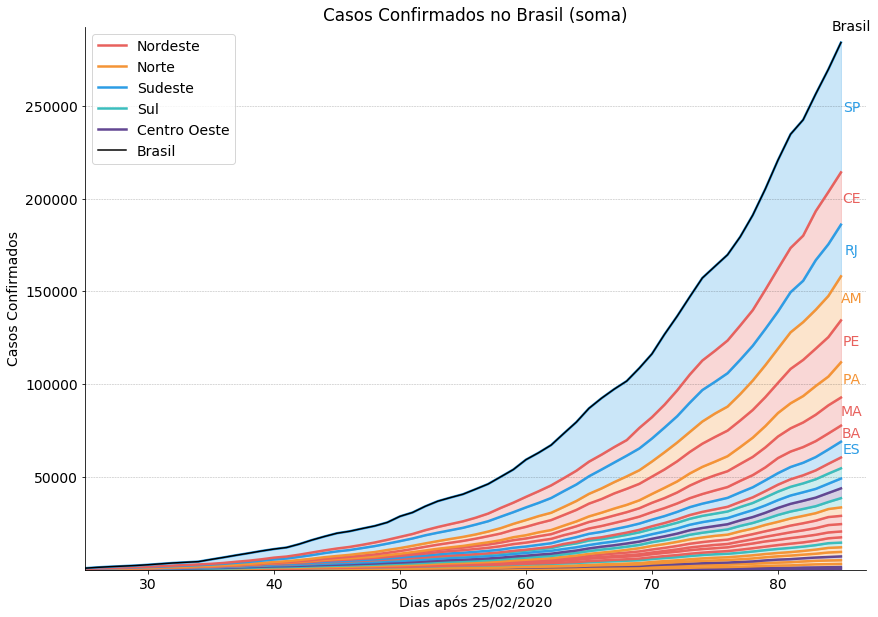

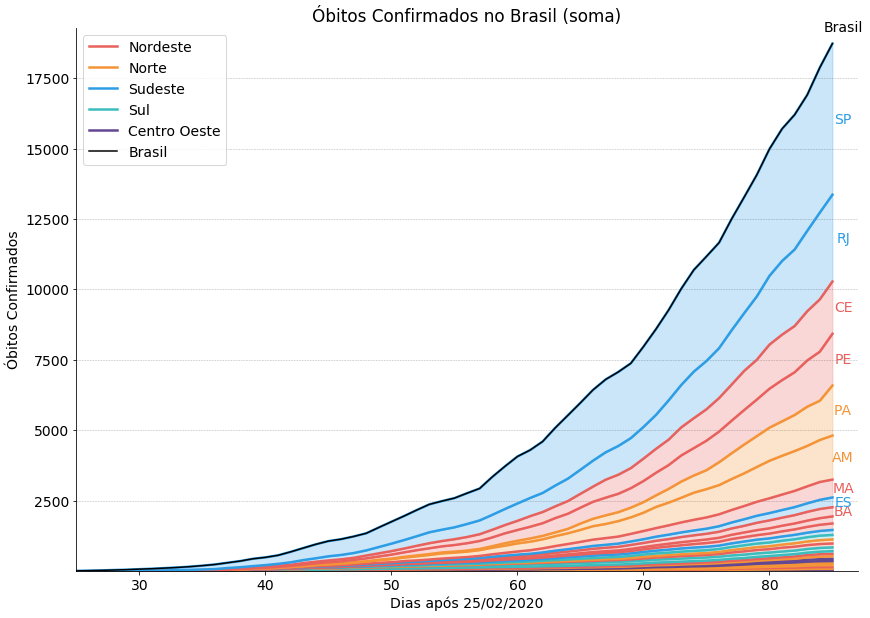

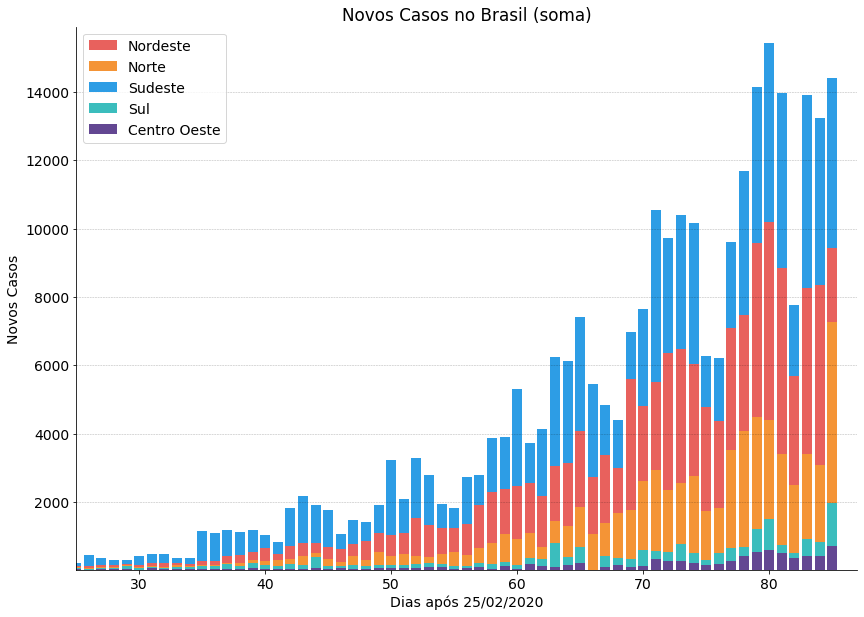

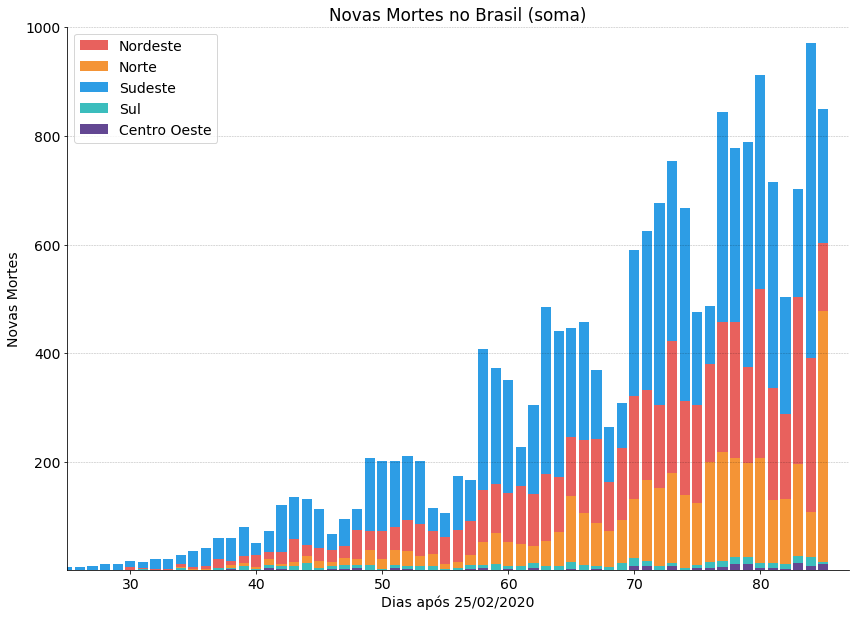

In [18]:
label = ["Estado", "Regiao", "População", "Último Dado", "Data", "Dia", "Casos Confirmados",
         "Óbitos Confirmados", "Novos Casos", "Novas Mortes", "Incidência de Casos", "Mortalidade"]

for f in range(6, 10) :
        
    plt.rc('font', size=14)
    plt.rcParams['figure.figsize'] = [14, 10]

    plt.gca().spines["top"].set_visible(False)    
    plt.gca().spines["right"].set_visible(False)
    plt.gca().get_xaxis().tick_bottom()    
    plt.gca().get_yaxis().tick_left()
    plt.grid(True, axis = 'y', linestyle = "dashed", lw = 0.5, color = "black", alpha = 0.3)
    
    if f in [6, 7] :
        dia = max(df_estados.loc[:, 'day'])
        
        reg = ['Nordeste', 'Norte', 'Sudeste', 'Sul', 'Centro Oeste']
        estados = list(df_estados.loc[df_estados['is_last'],
                                      [df_estados.columns[f], 'state']
                                     ].sort_values(df_estados.columns[f], ascending = True)['state'].unique())
        
        x_max = dia
        y_max = max(df_Brasil.iloc[range(len(df_Brasil.index)), f - 6])
        
        # Brasil data
        x = range(25, len(df_Brasil.index))
        y = list(df_estados.loc[df_estados['state'] == estados[0], 
                                df_estados.columns[f]
                               ].tail(dia - 25).reset_index(drop = True))

        for r in range(len(Regiao)) :
            plt.plot(range(5), range(5), label = reg[r], color = color[r], lw = 2.5)
            if estados[0] in Regiao[r] :
                plt.plot(x, y, marker = ' ', color = color[r], lw = 2.5)     
        temp = list(df_estados.loc[df_estados['state'] == estados[0], 
                                   df_estados.columns[f]
                                  ].tail(dia - 25).reset_index(drop = True))

        for e in range(1, 27) :                  
            tempa = temp
            tempb = list(df_estados.loc[df_estados['state'] == estados[e], 
                                        df_estados.columns[f]
                                       ].tail(dia - 25).reset_index(drop = True))               
            y = [sum(i) for i in zip(temp, tempb)]
            temp = y

            for r in range(len(Regiao)) :    
                if estados[e] in Regiao[r] :
                    plt.plot(x, y, marker = ' ', color = color[r], lw = 2.5)
                    if e > 17 :
                        plt.text(max(x) * 1.01, (max(temp) + max(tempa)) * 0.5, estados[e], color = color[r], fontsize = 14, 
                                 horizontalalignment = 'center', verticalalignment = 'center')
                    plt.fill_between(x, temp, tempa, color = (color[r] + '40'))

        # Brasil data
        x = range(len(df_Brasil.index))
        y = list(df_Brasil.iloc[x, f - 6])
        plt.plot(x, y, color = 'black', label = "Brasil", lw = 1.5) 
        plt.text(max(x) * 1.01, y[-1] * 1.03, "Brasil", color = "black", fontsize = 14,
                 horizontalalignment = 'center', verticalalignment = 'center')               

        plt.xlim(25, x_max + 1)
        plt.ylim(1, y_max * 1.03)
    
    else :
        dia = len(df_Brasil.index)
        
        df_estados['region'] = 'null'
        reg = ['B Nordeste', 'C Norte', 'A Sudeste', 'D Sul', 'E Centro Oeste']
        for r in range(len(Regiao)) :
            for a in range(len(Regiao[r])) :
                df_estados.loc[df_estados['state'].eq(Regiao[r][a]), 'region'] = reg[r]
        
        estados = list(df_estados.loc[df_estados['is_last'],
                                      ['state', 'region']
                                     ].sort_values('region', ascending = False)['state'].unique())
        
        x_max = len(df_Brasil.index)
        y_max = max(df_Brasil.iloc[range(len(df_Brasil.index)), f - 6])
        
        x = list(range(25, len(df_Brasil.index)))
        y = list(df_estados.loc[df_estados['state'] == estados[0], 
                                df_estados.columns[f]
                               ].tail(dia - 25).reset_index(drop = True))

        for r in range(len(Regiao)) :
            plt.bar(range(1), range(1), label = str(reg[r])[2:], color = color[r])
            if estados[0] in Regiao[r] :
                plt.bar(x, y, color = color[r])    

        prev = y

        for e in range(1, 27) :                
            y = list(df_estados.loc[df_estados['state'] == estados[e], 
                                    df_estados.columns[f]
                                   ].tail(dia - 25).reset_index(drop = True))               

            for r in range(len(Regiao)) :    
                if estados[e] in Regiao[r] :
                    plt.bar(x, y, bottom = prev, color = color[r])
            prev = [sum(i) for i in zip(y, prev)]
     
        plt.xlim(25, x_max + 1)
        plt.ylim(1, y_max * 1.03)    
        
    plt.title(label[f] + " no Brasil (soma)")
    plt.legend(loc = 2, ncol = 1)
    plt.xlabel("Dias após 25/02/2020")
    plt.ylabel(label[f])
    plt.savefig('Graphics/' + label[f] + " Brasil soma.png")
    plt.show()
    
    reg = ['Nordeste', 'Norte', 'Sudeste', 'Sul', 'Centro Oeste']
    for r in range(len(Regiao)) :
            for a in range(len(Regiao[r])) :
                df_estados.loc[df_estados['state'].eq(Regiao[r][a]), 'region'] = reg[r]

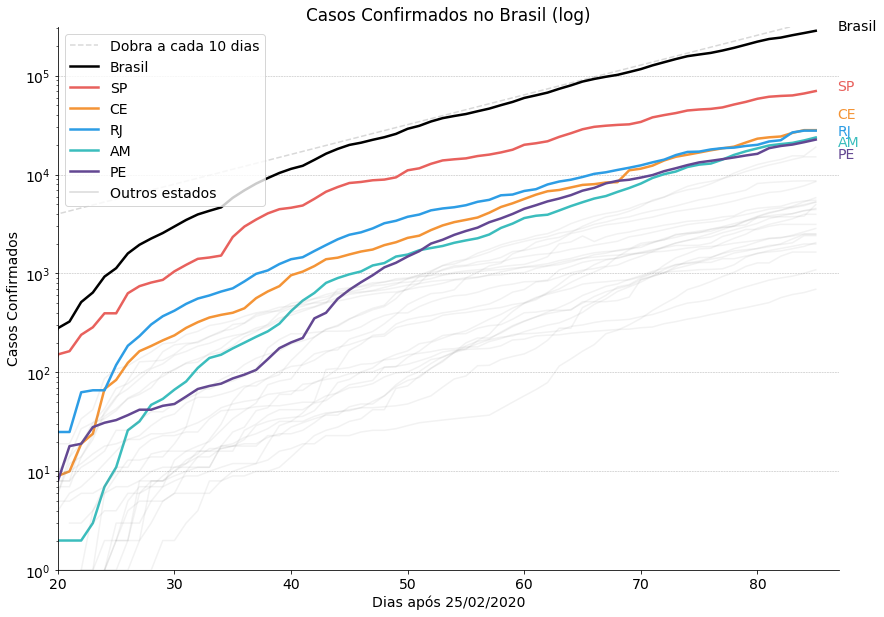

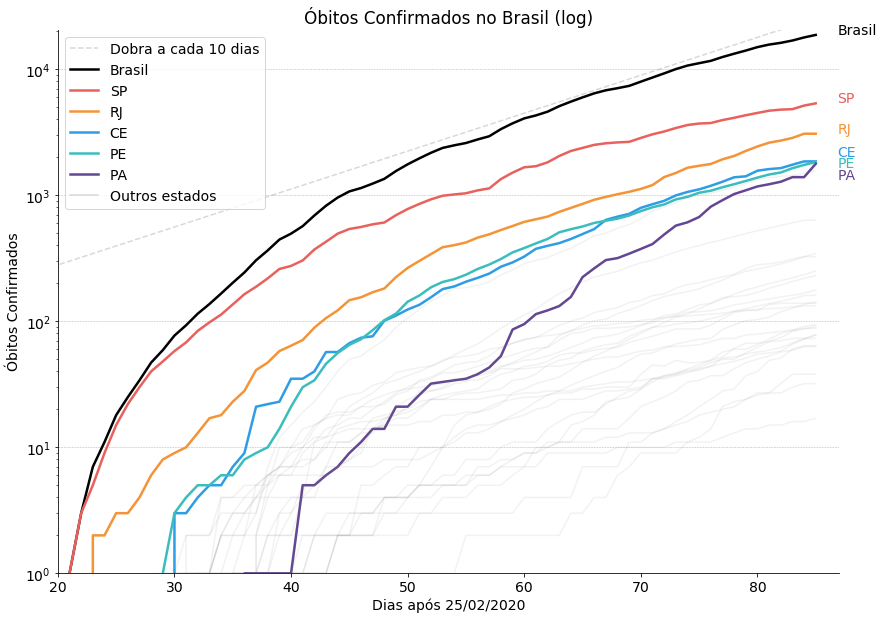

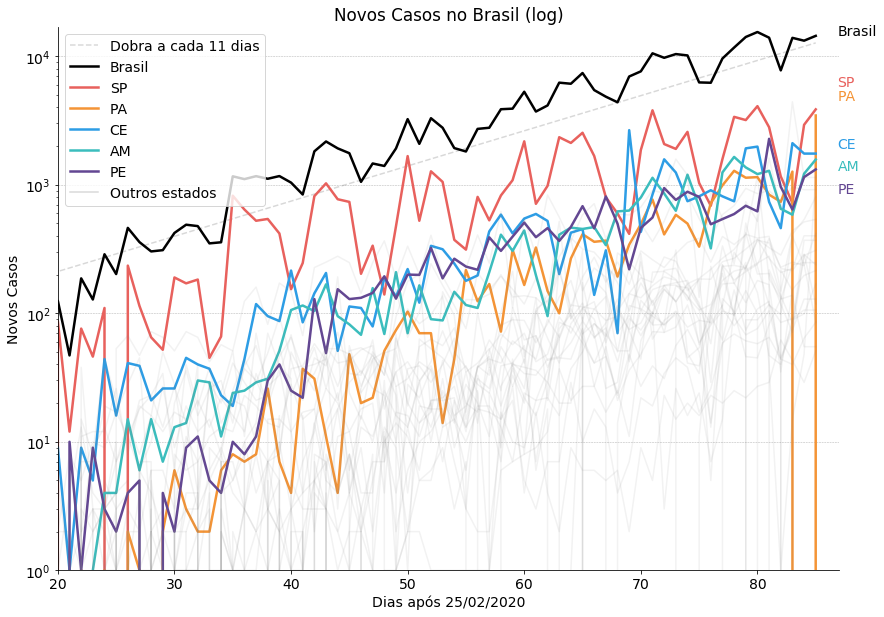

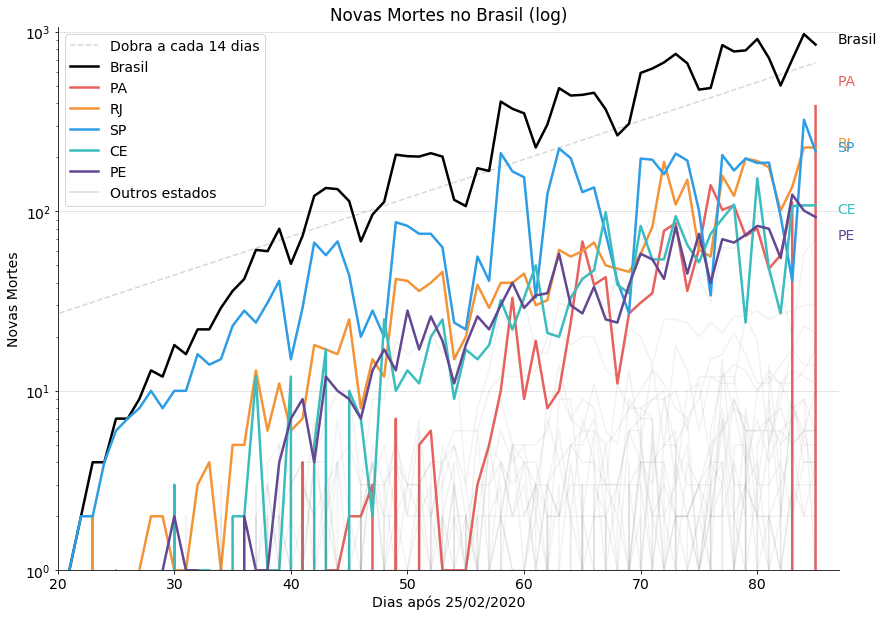

In [19]:
label = ["Estado", "Regiao", "População", "Último Dado", "Data", "Dia", "Casos Confirmados",
         "Óbitos Confirmados", "Novos Casos", "Novas Mortes", "Incidência de Casos", "Mortalidade"]

dia = len(df_Brasil.index)

a = [10 ** 3, 70, 60, 10]
b = [10, 10, 11, 14]

for f in range(6, 10) :
    
    plt.rc('font', size = 14)
    plt.rcParams['figure.figsize'] = [14, 10]

    plt.gca().spines["top"].set_visible(False)    
    plt.gca().spines["right"].set_visible(False)
    plt.gca().get_xaxis().tick_bottom()    
    plt.gca().get_yaxis().tick_left()
    plt.grid(True, axis = 'y', linestyle = "dashed", lw = 0.5, color = "black", alpha = 0.3)
    
    
    
    estados = list(df_estados.loc[df_estados['is_last'], 
                                  [df_estados.columns[f], 'state']                              
                                 ].sort_values(df_estados.columns[f], ascending = False)['state'].unique())
    
    # Brasil data
    x = list(df_Brasil.index.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-02-25", FMT)).days))
    x_max = dia

    y = list(df_Brasil.iloc[:, f - 6])
    y_max = max(df_Brasil.iloc[:, f - 6])
    
    plt.plot(x, [np.exp(X * np.log(2) / b[f - 6] ) * a[f - 6] for X in x], label = "Dobra a cada " + str(b[f - 6]) + " dias", 
             linestyle = 'dashed', color = (.5, .5, .5, .3))
    
    plt.plot(x, y, marker = ' ', color = 'black', label = "Brasil", lw = 2.5) 
    plt.text(x_max * 1.01, 1.01 * y[-1], "Brasil", color = "black", fontsize = 14)   

    for e in range(27) :  

        x = list(df_estados.loc[df_estados['state'] == estados[e],
                                'date'].map(lambda x : (datetime.strptime(x, FMT) - 
                                                        datetime.strptime("2020-02-25", FMT)).days))
        
        y = list(df_estados.loc[df_estados['state'] == estados[e], df_estados.columns[f]])
        if y[-1] == 0 :
            y[-1] = y[-2]
        ytab = [[0], [0], [0], [0], [0], [0],
                [1.01, 1.3, .9, .82, .65], [1.01, 1.01, 1.1, .9, .75],
                [1.5, 1.3, 1.1, .82, .65], [1.3, 1, 1, .9, .75]]
        
        if e < 5 :
            plt.plot(x, y, marker = ' ', label = estados[e], color = color[e], lw = 2.5)
            if y[-1] > 0 :
                plt.text(x_max * 1.01, y[-1] * ytab[f][e], estados[e], color = color[e], fontsize = 14)
            elif y[-2] > 0 :
                plt.text(x_max * 1.01, y[-2] * ytab[f][e] * .1, estados[e], color = color[e], fontsize = 14)
            elif y[-3] > 0 :
                plt.text(x_max * 1.01, y[-3] * ytab[f][e] * .1, estados[e], color = color[e], fontsize = 14)
        
        elif e == 5 :
            plt.plot(x, y, marker = ' ', color = (.5, .5, .5, .1), lw = 1.5)
            plt.plot(1, 1, marker = ' ', label = 'Outros estados', color = (.5, .5, .5, .3), lw = 1.5)
        else :
            plt.plot(x, y, marker = ' ', color = (.5, .5, .5, .1), lw = 1.5)
            
    plt.xlim(20, x_max + 1)
    plt.ylim(1, y_max * 1.1)       
        
    plt.title(label[f] + " no Brasil (log)")
    plt.legend(loc = 2)
    plt.yscale('log')
    plt.xlabel("Dias após 25/02/2020")
    plt.ylabel(label[f])
    plt.savefig('Graphics/' + label[f] + " Brasil log.png")
    plt.show()
